# Course 2 Assignment: Diagnostic Analysis using Python

## Ryan Brenner

#### Objective: Help the NHS develop a data-informed solution to reduce the number of missed appointments across the country. Using historical and publically available data about GP surgery appointments across the country, answer the following main questions:

- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?

### My GitHub repository.

https://github.com/ryanbrenner1/Brenner_Ryan_DA201_Assignment

# 1. Import and Explore the Data

### Import libraries

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

### Import the data files

In [2]:
# Import the data files and store the data in DataFrames.

ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
tweets = pd.read_csv('tweets.csv')

### Sense-check the new DataFrames.
#### Determine the number of rows and columns, data types, and column names.

In [3]:
# Sense-check the ad DataFrame

print(ad.shape)
print(ad.dtypes)
print(ad.columns)

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


In [4]:
# Sense-check the ar DataFrame

print(ar.shape)
print(ar.dtypes)
print(ar.columns)

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


In [5]:
# Sense-check the nc DataFrame

print(nc.shape)
print(nc.dtypes)
print(nc.columns)

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [6]:
# Sense-check the tweets DataFrame

print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


### Check for missing values in each DataFrame.

In [7]:
# Check for missing values in the ad DataFrame.

ad_missing = ad[ad.isna().any(axis=1)]

ad_missing.shape

(0, 8)

In [8]:
# Check for missing values in the ar DataFrame.

ar_missing = ar[ar.isna().any(axis=1)]

ar_missing.shape

(0, 7)

In [9]:
# Check for missing values in the nc DataFrame.

nc_missing = nc[nc.isna().any(axis=1)]

nc_missing.shape

(0, 8)

>The ad, ar and nc DataFrames do not have any missing values, indicating clean data.

In [10]:
# Check for missing values in the tweets DataFrame.

tweets_missing = tweets[tweets.isna().any(axis=1)]

tweets_missing.shape

(167, 10)

> There are 167 missing values in the tweets DataFrame.

In [11]:
# Identify the column in the tweets DataFrame with the missing values.

# View the tweets metadata.
print(tweets.info())

# Identify the number of missing values in the relevant column.
print('Missing values: ', tweets['tweet_entities_hashtags'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
Missing values:  167


> All 167 of the missing values are in the 'tweet_entities_hashtags' column and represent tweets without hashtags. This is acceptable and doesn't negatively affect the quality of the data.

### Descriptive Statistics and Metadata

In [12]:
# Determine the descriptive statistics and metadata for the ad DataFrame.

print(ad.describe())
print(ad.info())

       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


In [13]:
# Determine the descriptive statistics and metadata for the ar DataFrame.

print(ar.describe())
print(ar.info())

       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
No

In [14]:
# Determine the descriptive statistics and metadata for the nc DataFrame.

print(nc.describe())
print(nc.info())

       count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), in

In [15]:
# Determine the descriptive statistics and metadata for the tweets DataFrame.

print(tweets.describe())
print(tweets.info())

           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   twe

### Explore the data set

**How many locations are there in the data set?**

In [16]:
# Determine the number of locations.

num_locations = len(nc['sub_icb_location_name'].unique())
print("There are %s locations in the data set." %num_locations)

There are 106 locations in the data set.


**What are the five locations with the highest number of records?**

In [17]:
# Determine the top five locations based on record count.

location_counts = nc['sub_icb_location_name'].value_counts().sort_values(ascending=False)

print("Top five locations based on highest record count: ")
print(location_counts.head(5))

Top five locations based on highest record count: 
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


> North West London is the location with the most records.

**How many service settings, context types, national categories, and appointment statuses are there?**

In [18]:
# Determine the number of service settings.

ss = len(nc['service_setting'].unique())
print("There are %s service settings." %ss)

# How many records were recorded for each service setting?
ss_counts = nc['service_setting'].value_counts().sort_values(ascending=False)

print("Service Settings: ")
print(ss_counts)

There are 5 service settings.
Service Settings: 
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


In [19]:
# Determine the number of context types.

ct = len(nc['context_type'].unique())
print("There are %s context types." %ct)

# How many records were recorded for each context type?
ct_counts = nc['context_type'].value_counts().sort_values(ascending=False)

print("Context Types: ")
print(ct_counts)

There are 3 context types.
Context Types: 
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


In [20]:
# Determine the number of national categories.

nat_cat = len(nc['national_category'].unique())
print("There are %s national categories." %nat_cat)

# How many records were recorded for each national category?
nat_cat_counts = nc['national_category'].value_counts().sort_values(ascending=False)

print("National Categories: ")
print(nat_cat_counts)

There are 18 national categories.
National Categories: 
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit     

In [21]:
# Determine the number of appointment statuses.

app_stat = len(ar['appointment_status'].unique())
print("There are %s appointment statuses." %app_stat)

# How many records were recorded for each appointment status?
app_stat_counts = ar['appointment_status'].value_counts().sort_values(ascending=False)

print("Appointment Statuses: ")
print(app_stat_counts)

There are 3 appointment statuses.
Appointment Statuses: 
Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


# 

# 2. Analyse the Data

#### Between what dates were appointments scheduled?

In [22]:
# Convert the data type to 'datetime' for the 'appointment_date' column in the ad DataFrame.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Ensure the data type has been updated correctly.
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 8.4+ MB
None


In [23]:
# Convert the data type to 'datetime' for the 'appointment_month' column in the ar DataFrame.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Ensure the data type has been updated correctly.
print(ar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB
None


In [24]:
# Determine the max and min appointment dates in the ad DataFrame.

print('Most Recent: ', ad['appointment_date'].max())
print('Oldest: ', ad['appointment_date'].min())

Most Recent:  2022-06-30 00:00:00
Oldest:  2021-12-01 00:00:00


> The appointment dates in the ad DataFrame range between 2021-12-01 and 2022-06-30.

In [25]:
# Determine the max and min appointment months in the ar DataFrame.

print('Most Recent: ', ar['appointment_month'].max())
print('Oldest: ', ar['appointment_month'].min())

Most Recent:  2022-06-01 00:00:00
Oldest:  2020-01-01 00:00:00


> The appointment months in the ar DataFrame range between 2020-01 and 2022-06.

In [26]:
# Determine the max and min appointment dates in the nc DataFrame.
# Note that the 'appointment_date' column in the nc DataFrame was already in the datetime format.

print('Most Recent: ', nc['appointment_date'].max())
print('Oldest: ', nc['appointment_date'].min())

Most Recent:  2022-06-30 00:00:00
Oldest:  2021-08-01 00:00:00


> The appointment dates in the nc DataFrame range between 2021-08-01 and 2022-06-30.

#### Further analyse North West London - the location with the most records. Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

In [27]:
# Create a subset of the nc DataFrame that only contains records in NW London from Jan 1 to Jun 1.
nc_subset = nc.loc[
    (nc['sub_icb_location_name']=='NHS North West London ICB - W2U3Z') &
    ((nc['appointment_date']>='2022-01-01') & (nc['appointment_date']<='2022-06-01'))
]

# Sense-check the subsetted DataFrame.
print(nc_subset.shape)

# How many appointments were reported for each service setting?
north_west_ss = nc_subset.groupby('service_setting')[['count_of_appointments']] \
.sum().sort_values('count_of_appointments', ascending=False)

north_west_ss

(5936, 8)


,count_of_appointments
service_setting,
General Practice,4804239
Unmapped,391106
Other,152897
Primary Care Network,109840
Extended Access Provision,98159


> The General Practice service setting reported the most appointments in NW London from 1 January 2022 to 1 June 2022.

#### Which month had the highest number of appointments?

In [28]:
# Group the nc DataFrame by 'appointment_month' and calculate the sum of appointments per month.
nc_appointments = nc.groupby('appointment_month')[['count_of_appointments']] \
.sum().sort_values('count_of_appointments', ascending=False)

nc_appointments

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508
2022-06,25828078
2022-01,25635474
2022-02,25355260
2021-12,25140776


> November 2021 is the month that had the highest number of appointments. 

#### What was the average number of appointments per month?

In [29]:
# Reformat the output to prevent scientific notation.
pd.set_option('display.float_format', lambda x: f'{x:.1f}')

# Use the nc_appointments DataFrame to calculate the average number of appointments per month.
nc_appointments.mean()

count_of_appointments   26913342.7
dtype: float64

> The average number of appointments per month was 26,913,343.

# 

# 3. Visualise and Identify Trends

### Import libraries

In [30]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as ticks.
sns.set_style('ticks')

### Identify possible monthly trends in the data.
Create visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [31]:
# Ensure the data type of the appointment month is a string to allow for easier plotting.
nc['appointment_month'].astype(str)

# View the metadata to confirm the data type of the appointment month is a string.
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


**Service settings:**

In [32]:
# Group the nc DataFrame by 'appointment_month' and 'service_setting', and \
# calculate the sum of appointments.

nc_ss = nc.groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


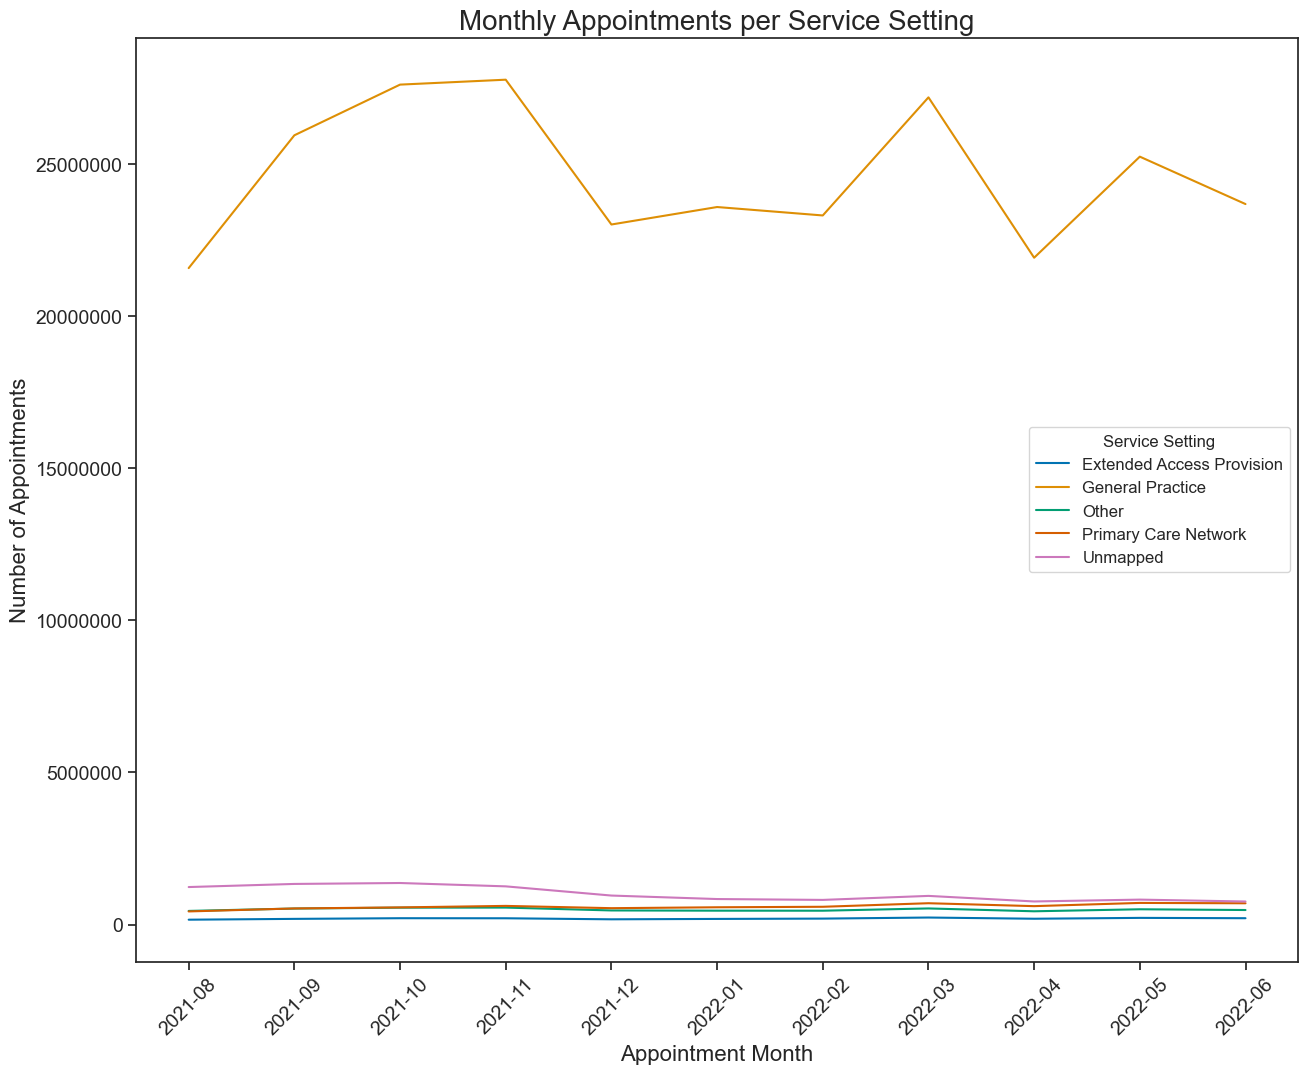

In [33]:
# Plot the the number of monthly appointments for each service setting over the available date range.
# Create a lineplot.
nc_ss_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='service_setting', palette='colorblind', data=nc_ss, ci=None)

# Specify and format the labels.
nc_ss_vis.set_xlabel("Appointment Month", fontsize=16)
nc_ss_vis.set_ylabel("Number of Appointments", fontsize=16)
nc_ss_vis.set_title("Monthly Appointments per Service Setting", fontsize=20)

plt.legend(title='Service Setting', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The General Practice (GP) service setting represented the vast majority of appointments from August 2021 to June 2022. The trend in the number of monthly GP appointments closely followed the trend in overall monthly appointments. 

In [34]:
# Save the nc_ss_vis visualisation as a PNG file.
fig_ss = nc_ss_vis.get_figure()
fig_ss.set_size_inches(15, 12)
fig_ss.savefig('service_settings.png', dpi=150)

**Context types:**

In [35]:
# Group the nc DataFrame by 'appointment_month' and 'context_type', and \
# calculate the sum of appointments.
nc_ct = nc.groupby(['appointment_month', 'context_type'])[['count_of_appointments']] \
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


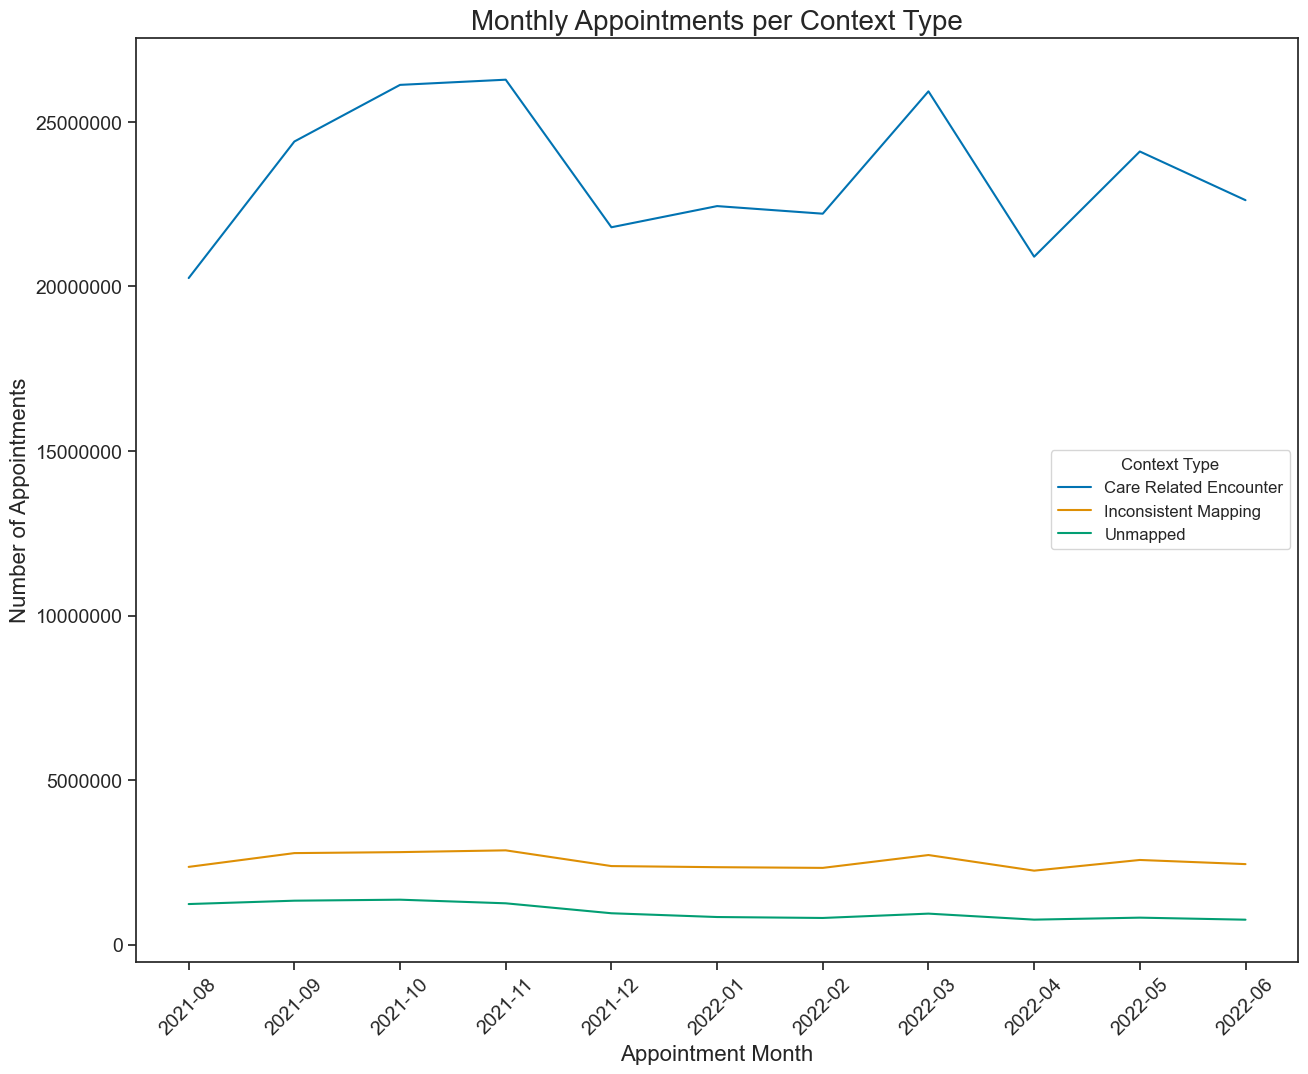

In [36]:
# Plot the the number of monthly appointments for each context type over the available date range.
# Create a lineplot.
nc_ct_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='context_type', palette='colorblind', data=nc_ct, ci=None)

# Specify and format the labels.
nc_ct_vis.set_xlabel("Appointment Month", fontsize=16)
nc_ct_vis.set_ylabel("Number of Appointments", fontsize=16)
nc_ct_vis.set_title("Monthly Appointments per Context Type", fontsize=20)

plt.legend(title='Context Type', loc='center right', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The Care Related Encounter context type represented the vast majority of appointments from August 2021 to June 2022. The trend in the number of monthly Care Related Encounter appointments closely followed the trend in overall monthly appointments. 

In [37]:
# Save the nc_ct_vis visualisation as a PNG file.
fig_ct = nc_ct_vis.get_figure()
fig_ct.set_size_inches(15, 12)
fig_ct.savefig('context_types.png', dpi=150)

**National categories:**

In [38]:
# Group the nc DataFrame by 'appointment_month' and 'national_category', and \
# calculate the sum of appointments.
nc_nc = nc.groupby(['appointment_month', 'national_category'])[['count_of_appointments']] \
.sum().sort_values('appointment_month').reset_index()

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Walk-in,34012
2,2021-08,Unplanned Clinical Activity,241523
3,2021-08,Unmapped,1233843
4,2021-08,Structured Medication Review,138570
...,...,...,...
193,2022-06,Care Home Visit,61546
194,2022-06,Care Home Needs Assessment & Personalised Care...,40222
195,2022-06,Unplanned Clinical Activity,274491
196,2022-06,Inconsistent Mapping,2447611


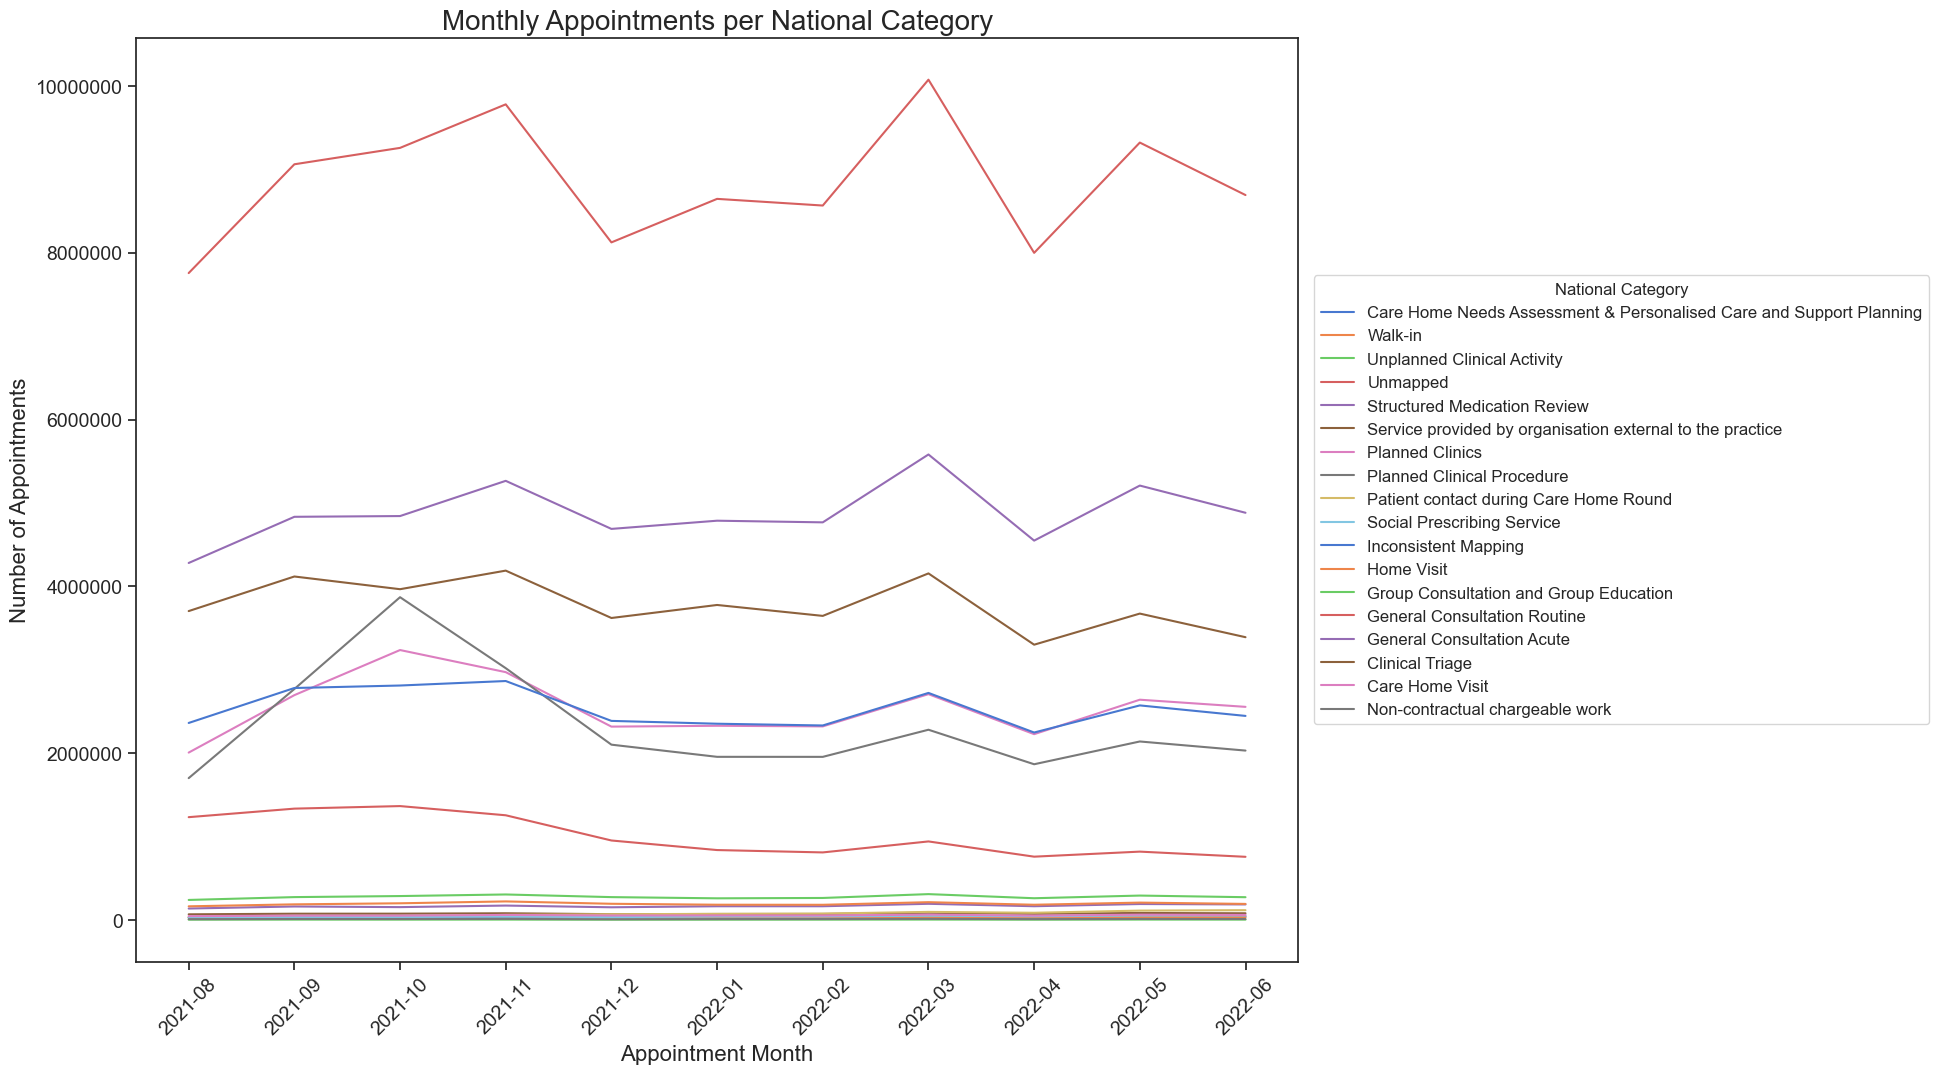

In [39]:
# Plot the the number of monthly appointments for each national category over the available date range.
# Create a lineplot.
nc_nc_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='national_category', palette='muted', data=nc_nc, ci=None)

# Specify and format the labels.
nc_nc_vis.set_xlabel("Appointment Month", fontsize=16)
nc_nc_vis.set_ylabel("Number of Appointments", fontsize=16)
nc_nc_vis.set_title("Monthly Appointments per National Category", fontsize=20)

plt.legend(title='National Category', loc='center right', fontsize=12, bbox_to_anchor=(1.55, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> Between August 2021 and June 2022, the General Consultation Routine national category represented national category with the highest number of monthly appointments. 

In [40]:
# Save the nc_nc_vis visualisation as a PNG file.
fig_nc = nc_nc_vis.get_figure()
fig_nc.set_size_inches(20, 12)
fig_nc.savefig('national_categories.png', dpi=150)

### Identify possible seasonal trends in the data.
Create visualisations indicating the number of appointments per service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [41]:
# Group the nc DataFrame by 'appointment_date', 'appointment_month' and 'service_setting', and \
# calculate the sum of appointments per day.
nc_ss_day = nc.groupby(['appointment_date', 'appointment_month', 'service_setting'])\
[['count_of_appointments']].sum().sort_values('appointment_date').reset_index()


# View output.
nc_ss_day

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
1665,2022-06-30,2022-06,Primary Care Network,34774
1666,2022-06-30,2022-06,Extended Access Provision,9163
1667,2022-06-30,2022-06,General Practice,1124374
1668,2022-06-30,2022-06,Other,23115


In [42]:
# Filter the nc_ss_day DataFrame for the summer season (August 2021).
summer = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08']

summer

,appointment_date,appointment_month,service_setting,count_of_appointments
0,2021-08-01,2021-08,Extended Access Provision,438
1,2021-08-01,2021-08,General Practice,3411
2,2021-08-01,2021-08,Other,401
3,2021-08-01,2021-08,Primary Care Network,323
4,2021-08-01,2021-08,Unmapped,1054
...,...,...,...,...
150,2021-08-31,2021-08,Unmapped,62380
151,2021-08-31,2021-08,Other,23181
152,2021-08-31,2021-08,Primary Care Network,21789
153,2021-08-31,2021-08,General Practice,1125584


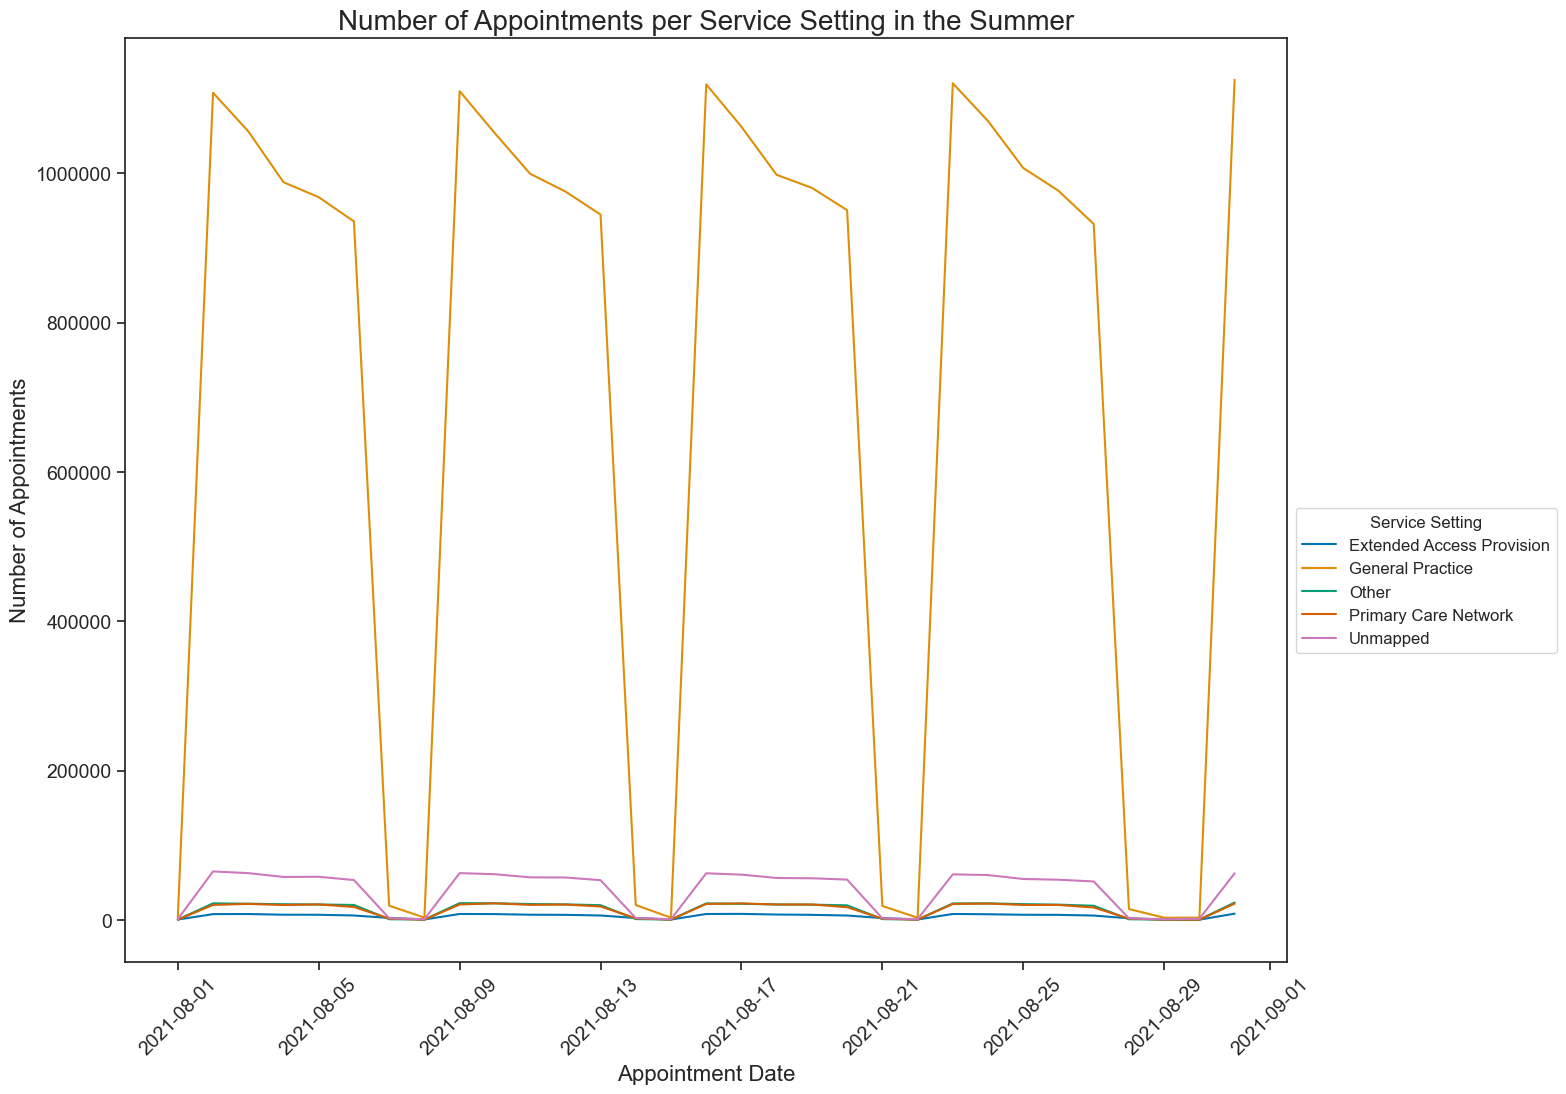

In [43]:
# Plot the number of daily appointments for each service setting in the summer.
# Create a lineplot.
summer_ss = sns.lineplot(x='appointment_date', y='count_of_appointments',
                         hue='service_setting', palette='colorblind',
                             data=summer, ci=None)

# Specify and format the labels.
summer_ss.set_xlabel("Appointment Date", fontsize=16)
summer_ss.set_ylabel("Number of Appointments", fontsize=16)
summer_ss.set_title("Number of Appointments per Service Setting in the Summer", fontsize=20)

plt.legend(title='Service Setting', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The General Practice service setting represented the vast majority of appointments in August 2021. It appears that the highest number of appointments took place at the beginning of the week and steadily decreased until the weekend. 

> The number of appointments in the summer appears to be less than all the other seasons. 

In [44]:
# Save the summer visualisation as a PNG file.
fig_summer = summer_ss.get_figure()
fig_summer.set_size_inches(28, 12)
fig_summer.savefig('summer.png', dpi=150)

**Autumn (October 2021):**

In [45]:
# Filter the nc_ss_day DataFrame for the autumn season (October 2021).
autumn = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10']

autumn

,appointment_date,appointment_month,service_setting,count_of_appointments
305,2021-10-01,2021-10,Extended Access Provision,7107
306,2021-10-01,2021-10,General Practice,1130646
307,2021-10-01,2021-10,Other,22639
308,2021-10-01,2021-10,Primary Care Network,22974
309,2021-10-01,2021-10,Unmapped,56201
...,...,...,...,...
455,2021-10-31,2021-10,Extended Access Provision,1113
456,2021-10-31,2021-10,General Practice,17449
457,2021-10-31,2021-10,Other,1147
458,2021-10-31,2021-10,Primary Care Network,1200


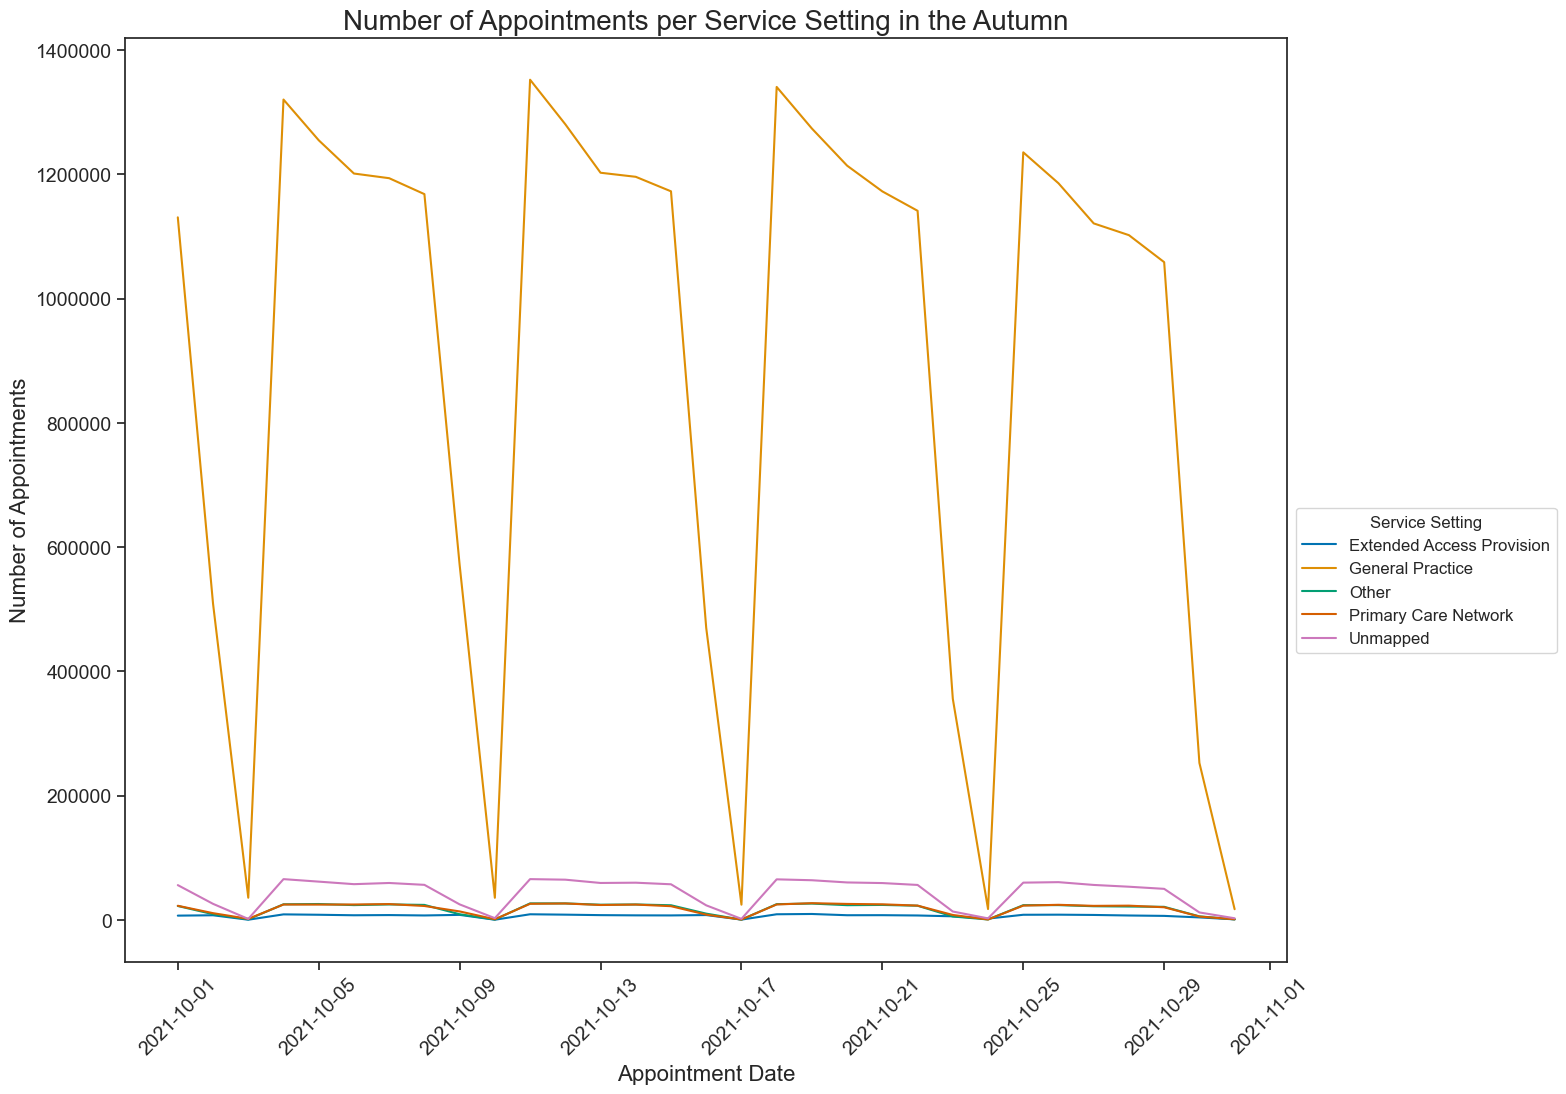

In [46]:
# Plot the number of daily appointments for each service setting in the autumn.
# Create a lineplot.
autumn_ss = sns.lineplot(x='appointment_date', y='count_of_appointments',
                         hue='service_setting', palette='colorblind',
                             data=autumn, ci=None)

# Specify and format the labels.
autumn_ss.set_xlabel("Appointment Date", fontsize=16)
autumn_ss.set_ylabel("Number of Appointments", fontsize=16)
autumn_ss.set_title("Number of Appointments per Service Setting in the Autumn", fontsize=20)

plt.legend(title='Service Setting', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The General Practice service setting represented the vast majority of appointments in October 2021. It appears that the highest number of appointments took place at the beginning of the week and steadily decreased until the weekend. 

In [47]:
# Save the autumn visualisation as a PNG file.
fig_autumn = autumn_ss.get_figure()
fig_autumn.set_size_inches(28, 12)
fig_autumn.savefig('autumn.png', dpi=150)

**Winter (January 2022):**

In [48]:
# Filter the nc_ss_day DataFrame for the winter season (January 2022).
winter = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01']

winter

,appointment_date,appointment_month,service_setting,count_of_appointments
765,2022-01-01,2022-01,Extended Access Provision,246
766,2022-01-01,2022-01,General Practice,3578
767,2022-01-01,2022-01,Other,280
768,2022-01-01,2022-01,Primary Care Network,215
769,2022-01-01,2022-01,Unmapped,572
...,...,...,...,...
915,2022-01-31,2022-01,Extended Access Provision,9962
916,2022-01-31,2022-01,General Practice,1305082
917,2022-01-31,2022-01,Other,25034
918,2022-01-31,2022-01,Primary Care Network,30509


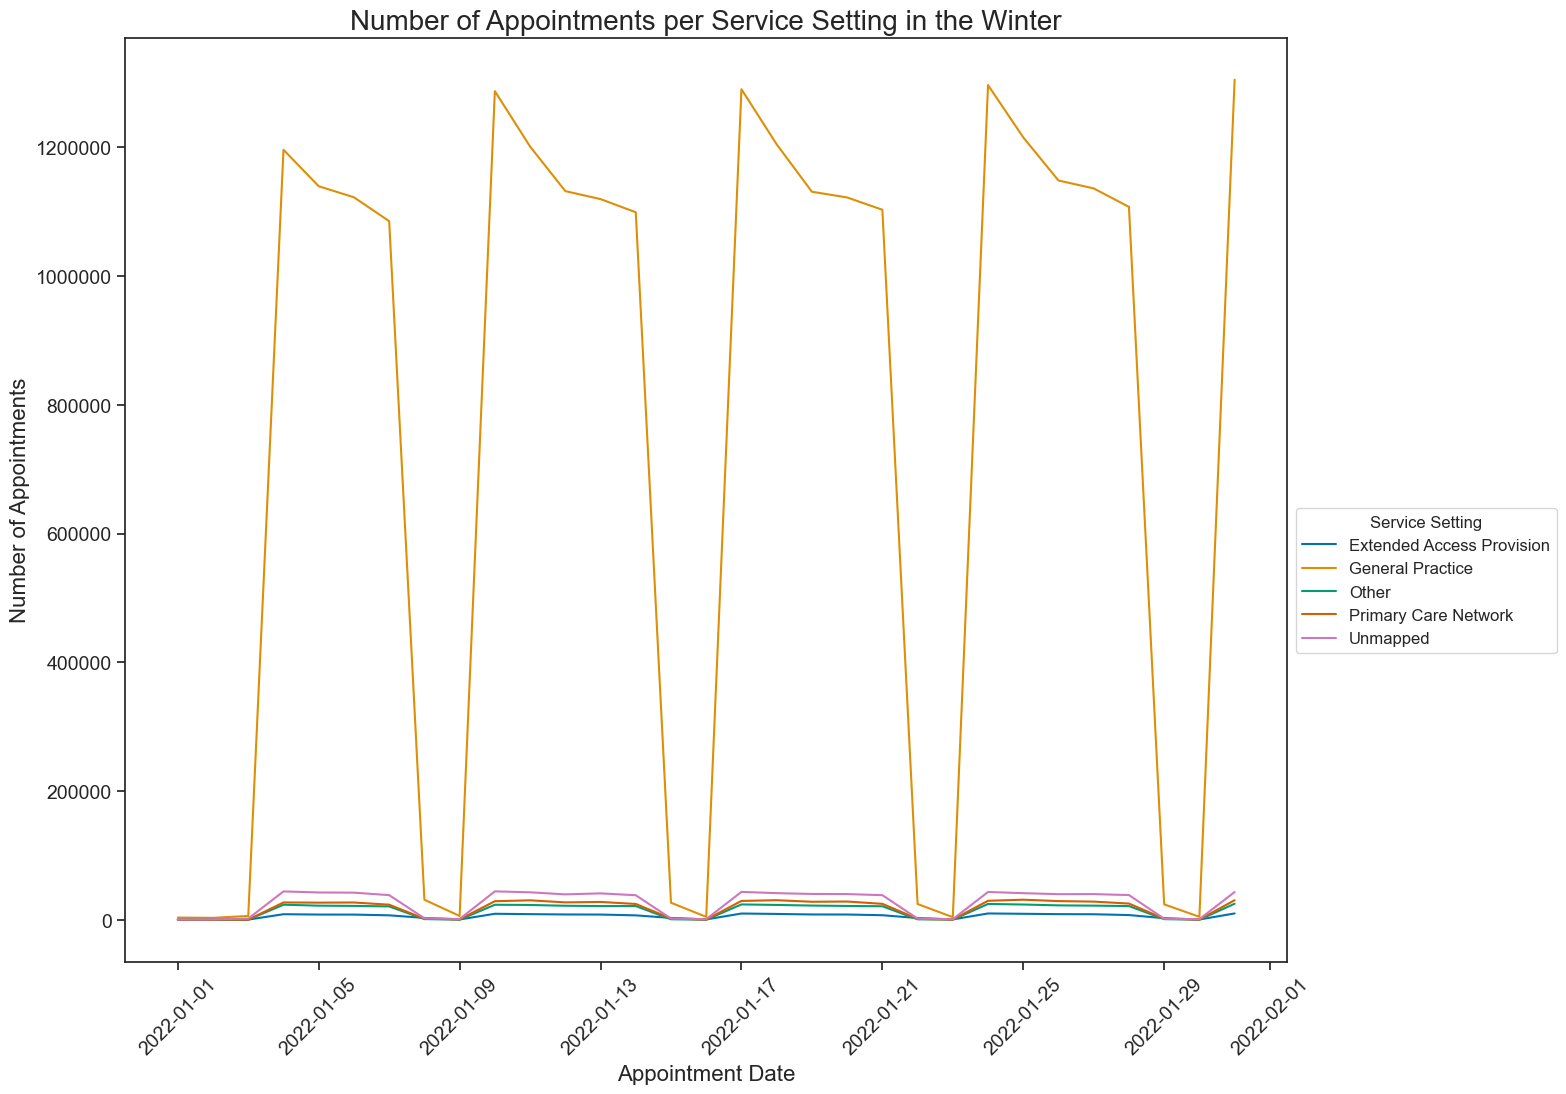

In [49]:
# Plot the number of daily appointments for each service setting in the winter.
# Create a lineplot.
winter_ss = sns.lineplot(x='appointment_date', y='count_of_appointments',
                         hue='service_setting', palette='colorblind',
                             data=winter, ci=None)

# Specify and format the labels.
winter_ss.set_xlabel("Appointment Date", fontsize=16)
winter_ss.set_ylabel("Number of Appointments", fontsize=16)
winter_ss.set_title("Number of Appointments per Service Setting in the Winter", fontsize=20)

plt.legend(title='Service Setting', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The General Practice service setting represented the vast majority of appointments in January 2022. It appears that the highest number of appointments took place at the beginning of the week and steadily decreased until the weekend. 

In [50]:
# Save the winter visualisation as a PNG file.
fig_winter = winter_ss.get_figure()
fig_winter.set_size_inches(28, 12)
fig_winter.savefig('winter.png', dpi=150)

**Spring (April 2022):**

In [51]:
# Filter the nc_ss_day DataFrame for the spring season (April 2022).
spring = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04']

spring

,appointment_date,appointment_month,service_setting,count_of_appointments
1215,2022-04-01,2022-04,Extended Access Provision,8011
1216,2022-04-01,2022-04,General Practice,1085037
1217,2022-04-01,2022-04,Other,21077
1218,2022-04-01,2022-04,Primary Care Network,26493
1219,2022-04-01,2022-04,Unmapped,36836
...,...,...,...,...
1360,2022-04-30,2022-04,Extended Access Provision,3416
1361,2022-04-30,2022-04,General Practice,23675
1362,2022-04-30,2022-04,Other,1148
1363,2022-04-30,2022-04,Primary Care Network,3150


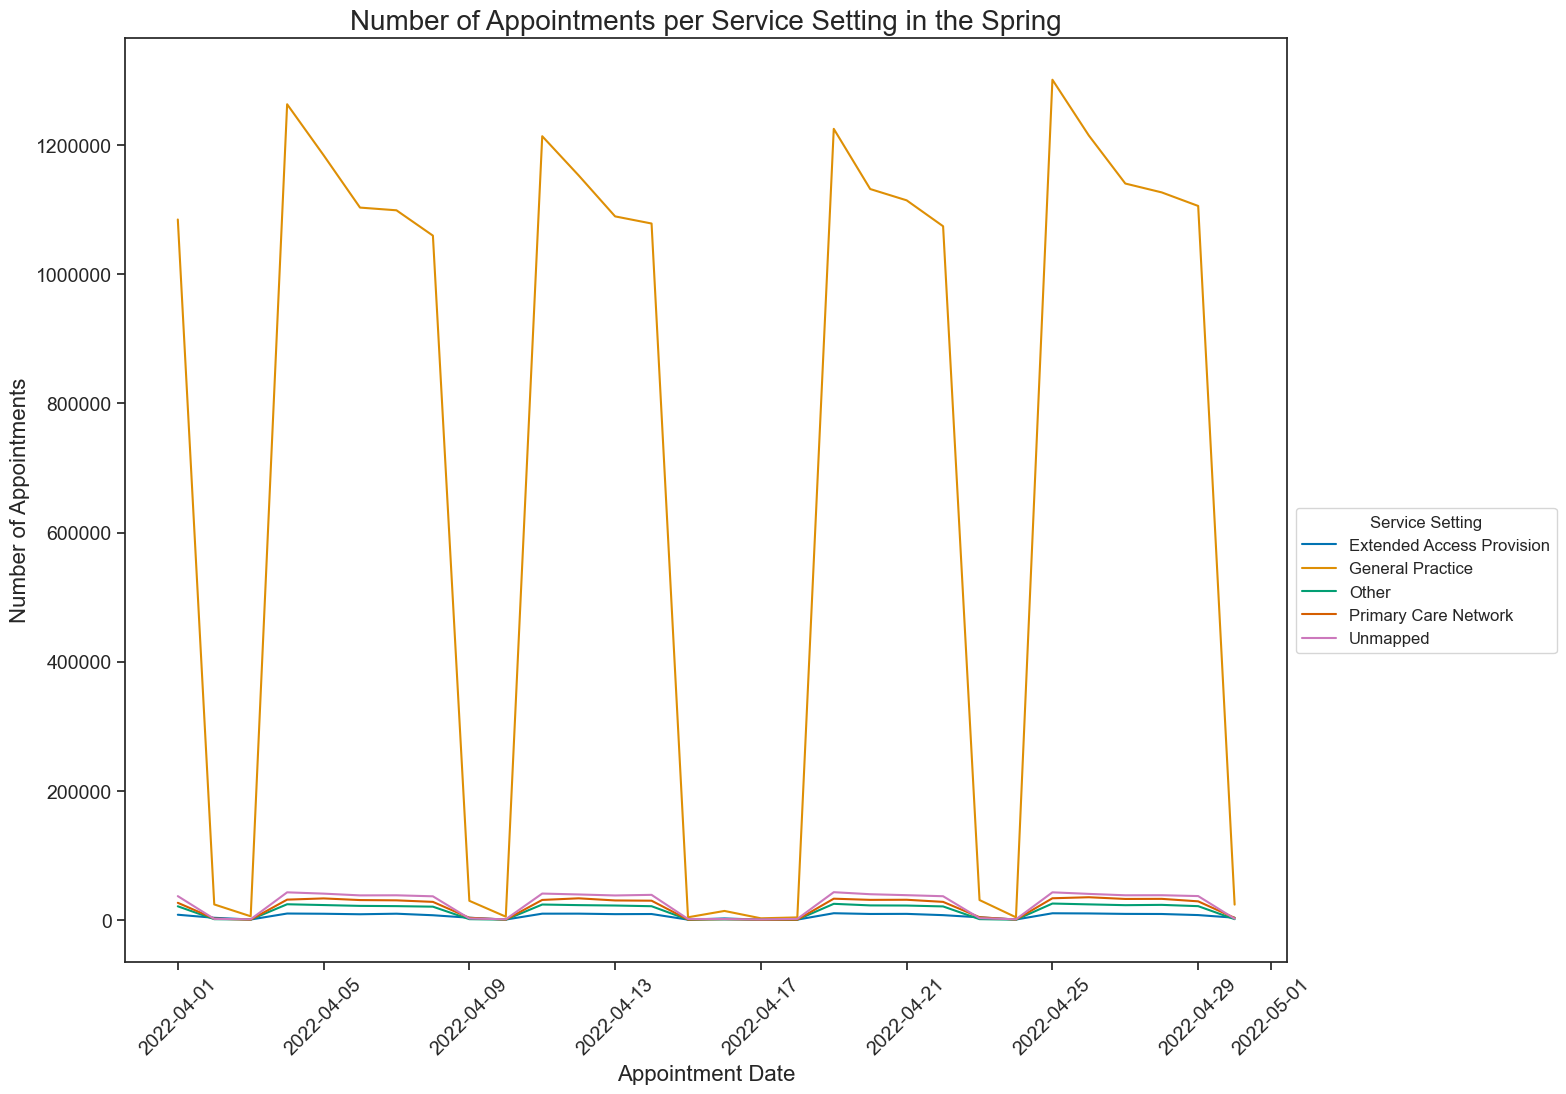

In [52]:
# Plot the number of daily appointments for each service setting in the spring.
# Create a lineplot.
spring_ss = sns.lineplot(x='appointment_date', y='count_of_appointments',
                         hue='service_setting', palette='colorblind',
                             data=spring, ci=None)

# Specify and format the labels.
spring_ss.set_xlabel("Appointment Date", fontsize=16)
spring_ss.set_ylabel("Number of Appointments", fontsize=16)
spring_ss.set_title("Number of Appointments per Service Setting in the Spring", fontsize=20)

plt.legend(title='Service Setting', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The General Practice service setting represented the vast majority of appointments in April 2022. It appears that the highest number of appointments took place at the beginning of the week and steadily decreased until the weekend. 

In [53]:
# Save the spring visualisation as a PNG file.
fig_spring = spring_ss.get_figure()
fig_spring.set_size_inches(28, 12)
fig_spring.savefig('spring.png', dpi=150)

# 

# 4. Analyse the Twitter Data

### Explore and analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [54]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as ticks.
sns.set_style('ticks')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [55]:
# Explore the tweets.csv data set and metadata.
print(tweets.describe())
print(tweets.info())

                   tweet_id  tweet_retweet_count  tweet_favorite_count
count                1174.0               1174.0                1174.0
mean  1567612055941214464.0                  8.6                   0.4
std        24275534270242.2                 29.8                   2.0
min   1567574368858914816.0                  0.0                   0.0
25%   1567589787532554240.0                  0.0                   0.0
50%   1567611203412713472.0                  1.0                   0.0
75%   1567633430776754176.0                  3.0                   0.0
max   1567655472005582848.0                303.0                  42.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-nul

In [56]:
# Explore how often tweets were retweeted.

print('The average number of retweets is', tweets['tweet_retweet_count'].mean())
print('The fewest number of retweets is', tweets['tweet_retweet_count'].min())
print('The highest number of retweets is', tweets['tweet_retweet_count'].max())

The average number of retweets is 8.62947189097104
The fewest number of retweets is 0
The highest number of retweets is 303


In [57]:
# Explore how often tweets were favorited.

print('The average number of favorites is', tweets['tweet_favorite_count'].mean())
print('The fewest number of favorites is', tweets['tweet_favorite_count'].min())
print('The highest number of favorites is', tweets['tweet_favorite_count'].max())

The average number of favorites is 0.37137989778534924
The fewest number of favorites is 0
The highest number of favorites is 42


### Identify which hashtags were most frequently used.

In [58]:
# Loop through the Twitter messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [59]:
# Create a Pandas series.
tags = pd.Series(tags)

# Display the first 30 records.
tags.head(30)

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [60]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags, columns=['Hashtags']).reset_index()

# View how often each hashtag was used.
counts = data['Hashtags'].value_counts()

counts

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Name: Hashtags, Length: 1754, dtype: int64

In [61]:
# Create a DataFrame that shows how often each hashtag was used. 
ht_counts = pd.DataFrame(counts).reset_index()

# Correct the names of the columns and view the updated DataFrame.
ht_counts.rename(columns={"index":"hashtags", "Hashtags":"counts"}, inplace=True)
ht_counts.head()

,hashtags,counts
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


> The most frequently used hashtag in the tweets data set was #healthcare. It was used 716 times.

In [62]:
# Convert the counts datatype to an integer.
ht_counts['counts'].astype(int)

# View the result.
ht_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hashtags  1754 non-null   object
 1   counts    1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [63]:
# Display records where the count is larger than 10.
ht_counts10 = ht_counts[ht_counts['counts']>10]
ht_counts10

,hashtags,counts
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [64]:
# Remove overrepresented hashtags from the data set.
ht_counts_final = ht_counts10[ht_counts10['counts']<100]
ht_counts_final

,hashtags,counts
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25


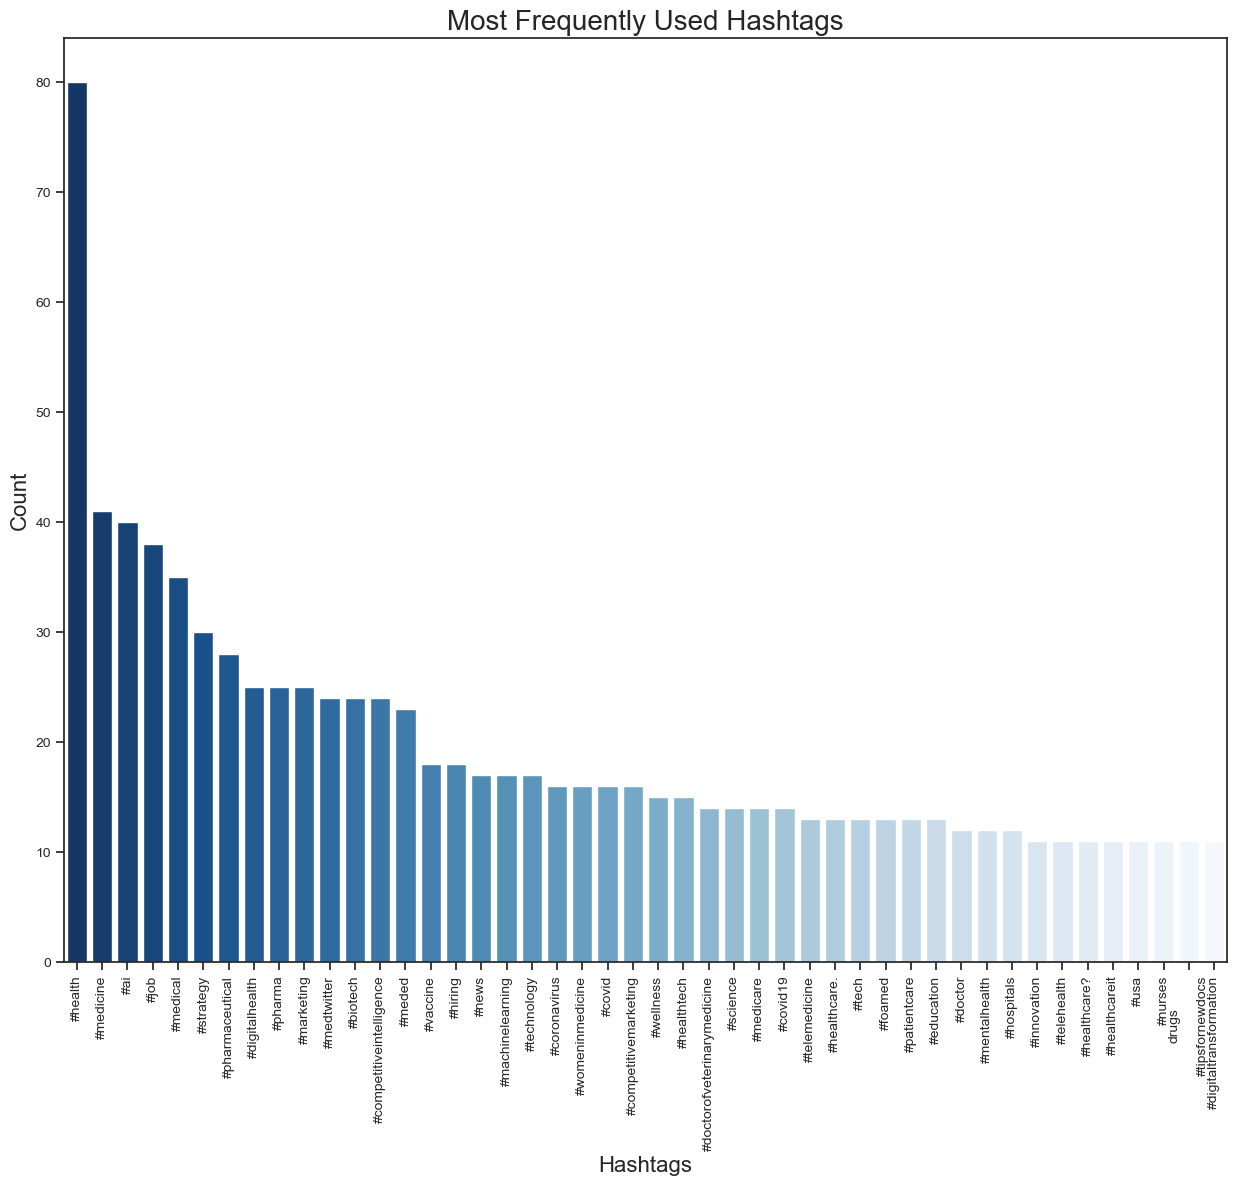

In [65]:
# Create a Seaborn barplot indicating hashtags with a count <100 and >10.

tweets_counts = sns.barplot(x='hashtags', y='counts', palette='Blues_r', data=ht_counts_final)

# Specify and format the labels.
tweets_counts.set_xlabel("Hashtags", fontsize=16)
tweets_counts.set_ylabel("Count", fontsize=16)
tweets_counts.set_title("Most Frequently Used Hashtags", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(rotation=90)

plt.show()

> Excluding the #healthcare hashtag, the most used hashtag was #health which was used 80 times. This was followed in order by #medicine, #ai, #job and #medical.

In [66]:
# Save the hashtag counts visualisation as a PNG file.
fig_hashtag = tweets_counts.get_figure()
fig_hashtag.set_size_inches(20, 20)
fig_hashtag.savefig('hashtag.png', dpi=150)

# 

# 5. Further Investigation for Recommendations

### Investigate the main concerns posed by the NHS. 

In [67]:
# View the ar DataFrame.
print(ar.info())
ar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   icb_ons_code                       596821 non-null  object        
 1   appointment_month                  596821 non-null  datetime64[ns]
 2   appointment_status                 596821 non-null  object        
 3   hcp_type                           596821 non-null  object        
 4   appointment_mode                   596821 non-null  object        
 5   time_between_book_and_appointment  596821 non-null  object        
 6   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 31.9+ MB
None


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [68]:
# Filter the ar DataFrame to only look at data from 2021-08 onwards.
ar_updated = ar[ar['appointment_month']>'2021-07']

ar_updated

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


### Should the NHS start looking at increasing staff levels? 

In [69]:
# Create a DataFrame to determine the total number of appointments per month.
ar_df = ar_updated.groupby(['appointment_month'])[['count_of_appointments']].sum()\
.sort_values('appointment_month').reset_index()

# Add a new column to indicate the average daily utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df['count_of_appointments']/30

# Reformat the output to prevent scientific notation.
pd.set_option('display.float_format', lambda x: f'{x:.1f}')

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation
0,2021-08-01,23852171,795072.4
1,2021-09-01,28522501,950750.0
2,2021-10-01,30303834,1010127.8
3,2021-11-01,30405070,1013502.3
4,2021-12-01,25140776,838025.9
5,2022-01-01,25635474,854515.8
6,2022-02-01,25355260,845175.3
7,2022-03-01,29595038,986501.3
8,2022-04-01,23913060,797102.0
9,2022-05-01,27495508,916516.9


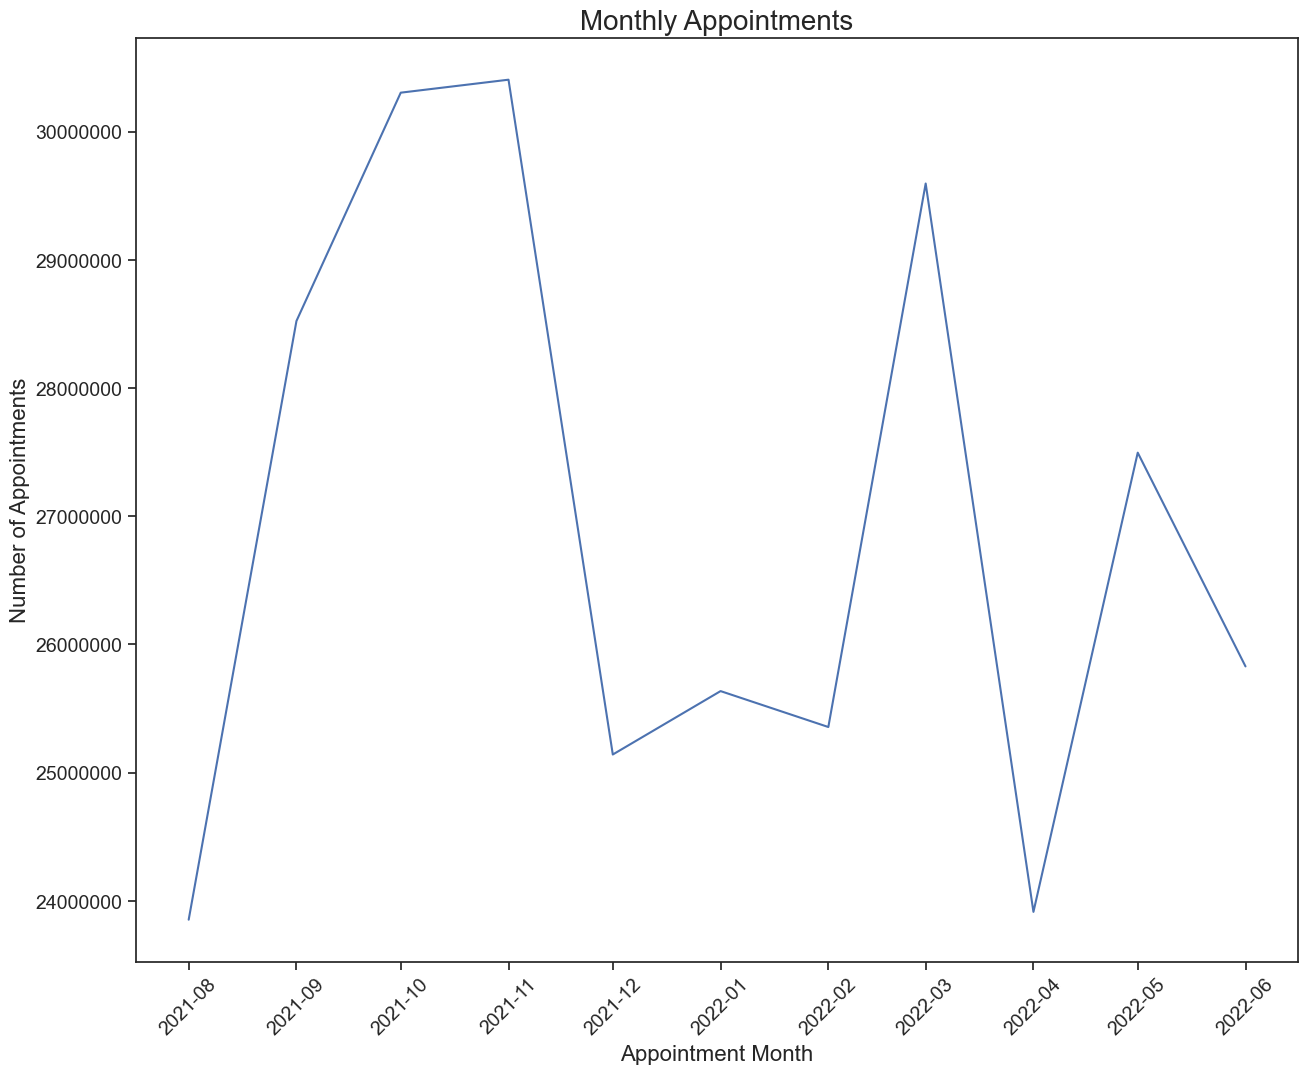

In [70]:
# Plot the sum of monthly appointments.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'].astype(str)

# Create a lineplot with Seaborn.
ar_df_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         palette='colorblind', data=ar_df, ci=None)

# Specify and format the labels.
ar_df_vis.set_xlabel("Appointment Month", fontsize=16)
ar_df_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_df_vis.set_title("Monthly Appointments", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The month with the highest number of appointments was November 2021. 

In [71]:
# Save the monthly appointments visualisation as a PNG file.
fig_ar_df_vis = ar_df_vis.get_figure()
fig_ar_df_vis.set_size_inches(15, 12)
fig_ar_df_vis.savefig('total_monthly_appointments.png', dpi=150)

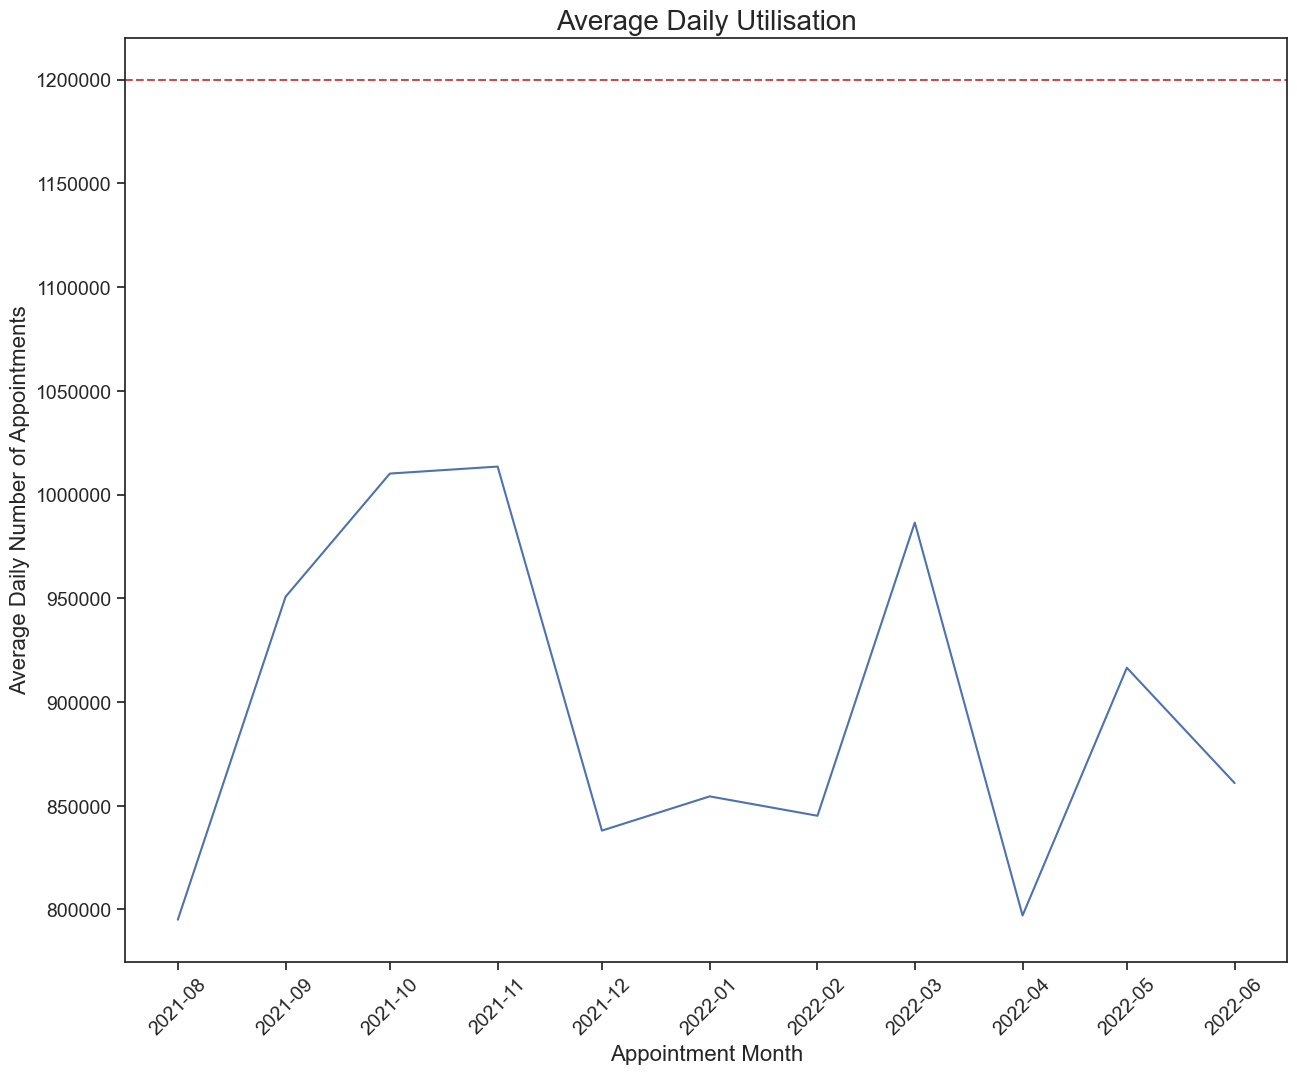

In [72]:
# Plot monthly utilisation.
ar_df_utl = sns.lineplot(x='appointment_month', y='utilisation',
                         palette='colorblind', data=ar_df, ci=None)

# Specify and format the labels.
ar_df_utl.set_xlabel("Appointment Month", fontsize=16)
ar_df_utl.set_ylabel("Average Daily Number of Appointments", fontsize=16)
ar_df_utl.set_title("Average Daily Utilisation", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Add line to show NHS's daily appointment capacity of 1,200,000.
plt.axhline(y=1200000, color='r', linestyle='--')

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The month with the highest average daily appointments was November 2021 which had an average of 1,013,502 daily appointments. The NHS has a maximum capacity of 1,200,000 appointments per day, demonstrating sufficient resources to accommodate demand.

In [73]:
# Save the utilisation visualisation as a PNG file.
fig_ar_df_utl = ar_df_utl.get_figure()
fig_ar_df_utl.set_size_inches(15, 12)
fig_ar_df_utl.savefig('daily_utilisation.png', dpi=150)

 ### How do the healthcare professional types differ over time?

In [74]:
# Create a new DataFrame that is grouped by 'appointment_month' and 'hcp_type', and \
# calculate the sum of appointments.
ar_hcp = ar_updated.groupby(['appointment_month', 'hcp_type'])\
                             [['count_of_appointments']].sum().reset_index()

ar_hcp

,appointment_month,hcp_type,count_of_appointments
0,2021-08-01,GP,12299022
1,2021-08-01,Other Practice staff,10797821
2,2021-08-01,Unknown,755328
3,2021-09-01,GP,14487785
4,2021-09-01,Other Practice staff,13126731
5,2021-09-01,Unknown,907985
6,2021-10-01,GP,14300751
7,2021-10-01,Other Practice staff,14942504
8,2021-10-01,Unknown,1060579
9,2021-11-01,GP,14897749


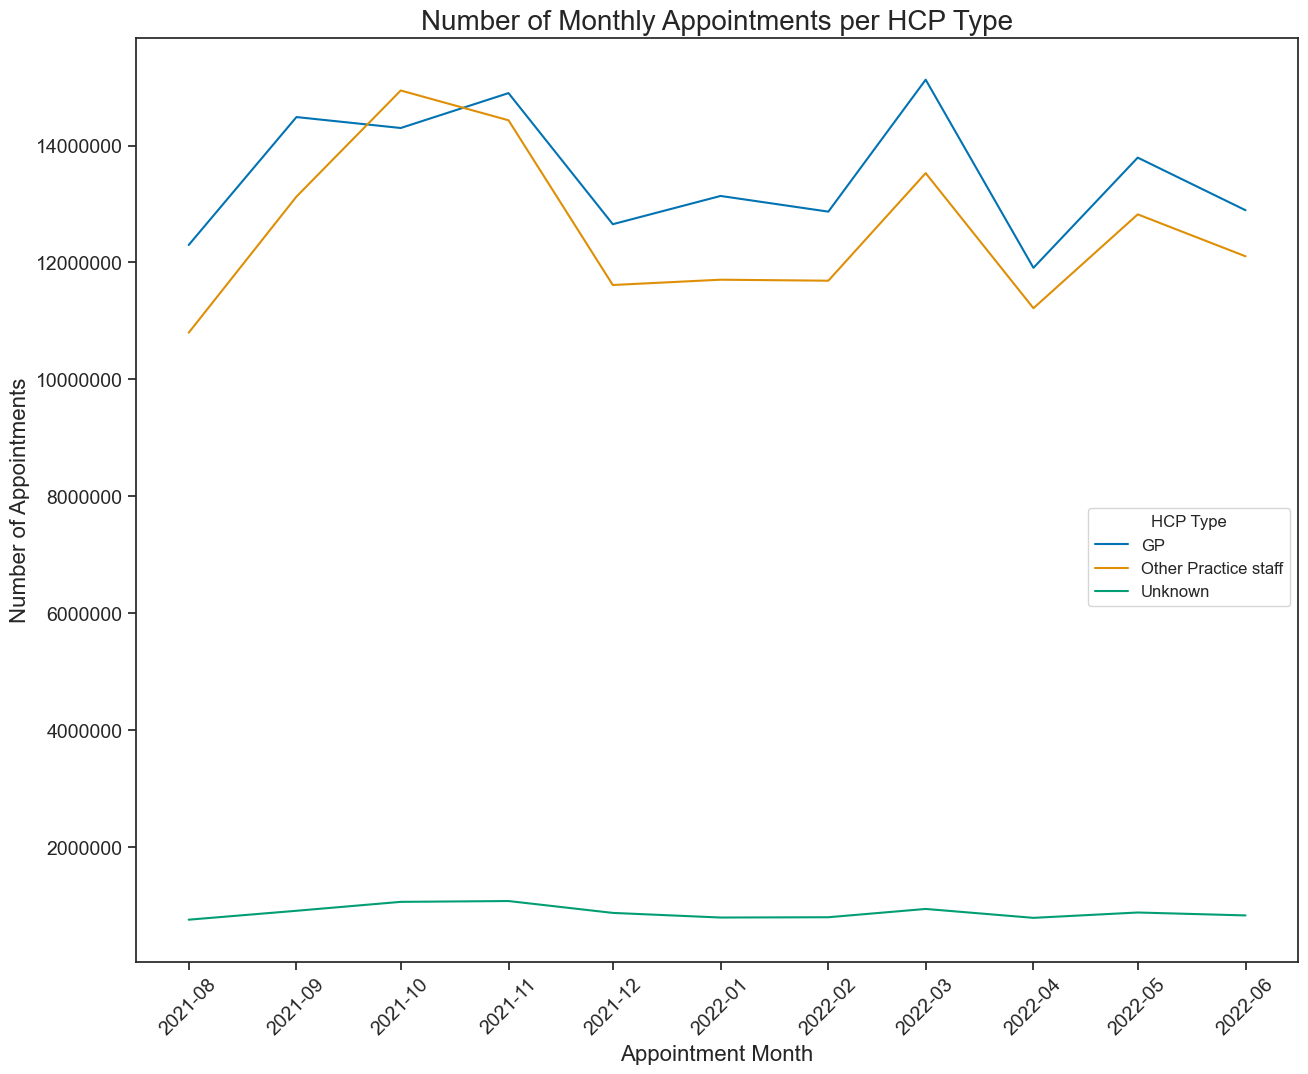

In [75]:
# Create a line plot to show how HCP types differ over time.
ar_hcp_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='hcp_type', palette='colorblind',
                             data=ar_hcp, ci=None)

# Specify and format the labels.
ar_hcp_vis.set_xlabel("Appointment Month", fontsize=16)
ar_hcp_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_hcp_vis.set_title("Number of Monthly Appointments per HCP Type", fontsize=20)

plt.legend(title='HCP Type', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The GP and Other Practice Staff healthcare professional types accounted for a similar number of monthly appointments from August 2021 to June 2022.

In [76]:
# Save the HCP visualisation as a PNG file.
fig_ar_hcp_vis = ar_hcp_vis.get_figure()
fig_ar_hcp_vis.set_size_inches(15, 12)
fig_ar_hcp_vis.savefig('monthly_appointments_per_hcp.png', dpi=150)

### Are there significant changes in whether or not visits are attended?

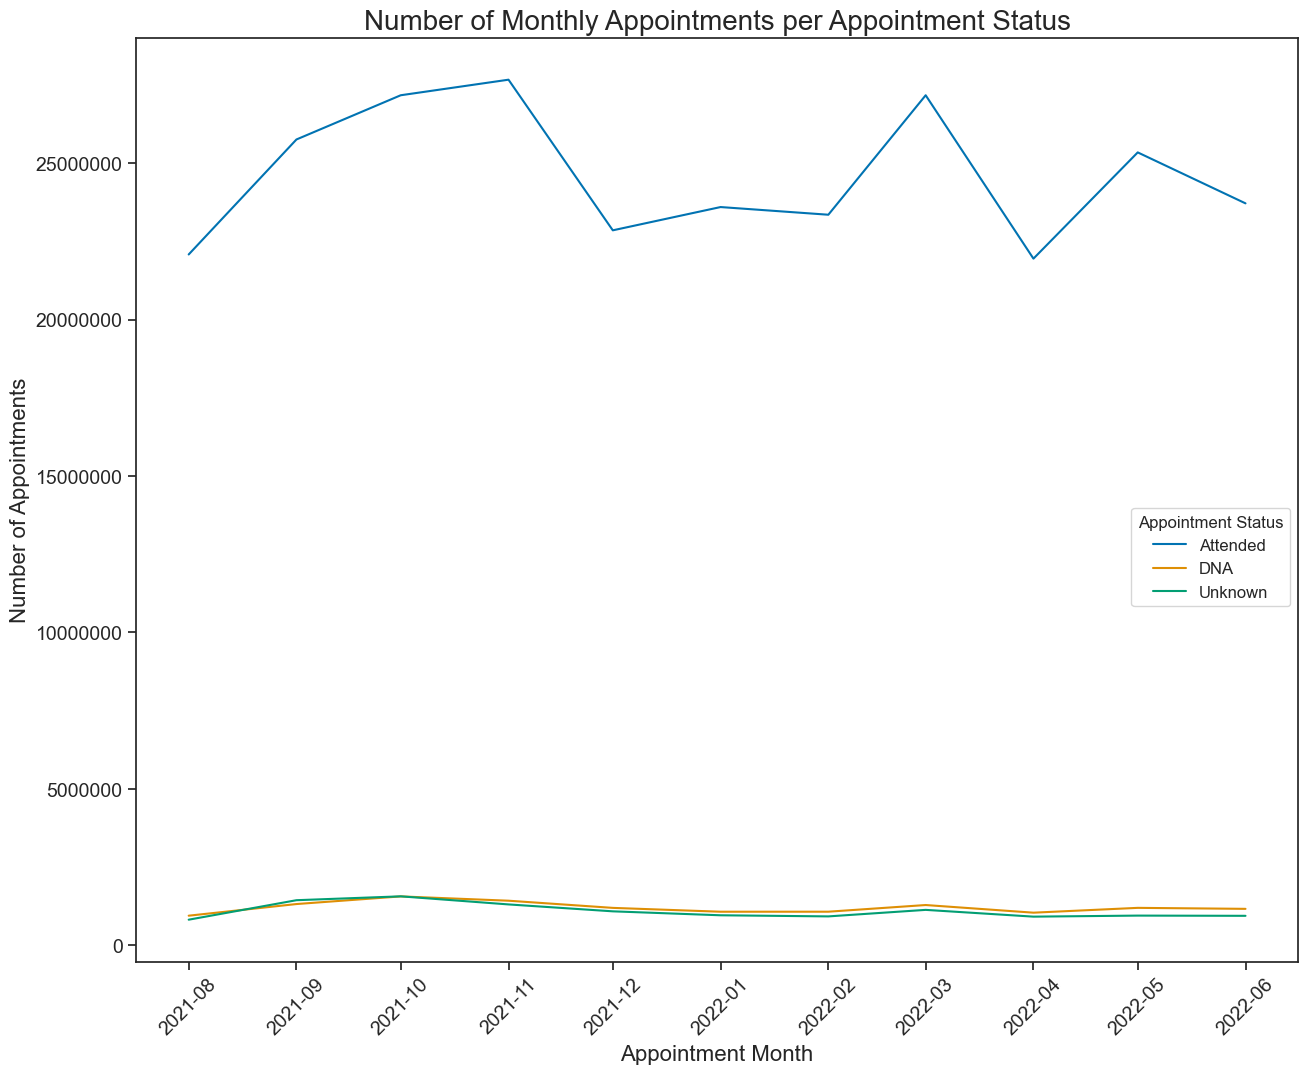

In [77]:
# Create a DataFrame that is grouped by 'appointment_month' and 'appointment_status', and \
# calculate the sum of appointments.
ar_attended = ar_updated.groupby(['appointment_month', 'appointment_status'])\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show how appointment statuses differ over time.
ar_attended_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='appointment_status', palette='colorblind',
                             data=ar_attended, ci=None)

# Specify and format the labels.
ar_attended_vis.set_xlabel("Appointment Month", fontsize=16)
ar_attended_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_attended_vis.set_title("Number of Monthly Appointments per Appointment Status", fontsize=20)

plt.legend(title='Appointment Status', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The vast majority of monthly appointments were attended. The trend in monthly attended appointments closely followed the trend in overall monthly appointments.

In [78]:
# Save the appointment status visualisation as a PNG file.
fig_ar_attended_vis = ar_attended_vis.get_figure()
fig_ar_attended_vis.set_size_inches(15, 12)
fig_ar_attended_vis.savefig('monthly_appointments_per_appointment_status.png', dpi=150)

**View the trend in the number of missed appointments per month.**

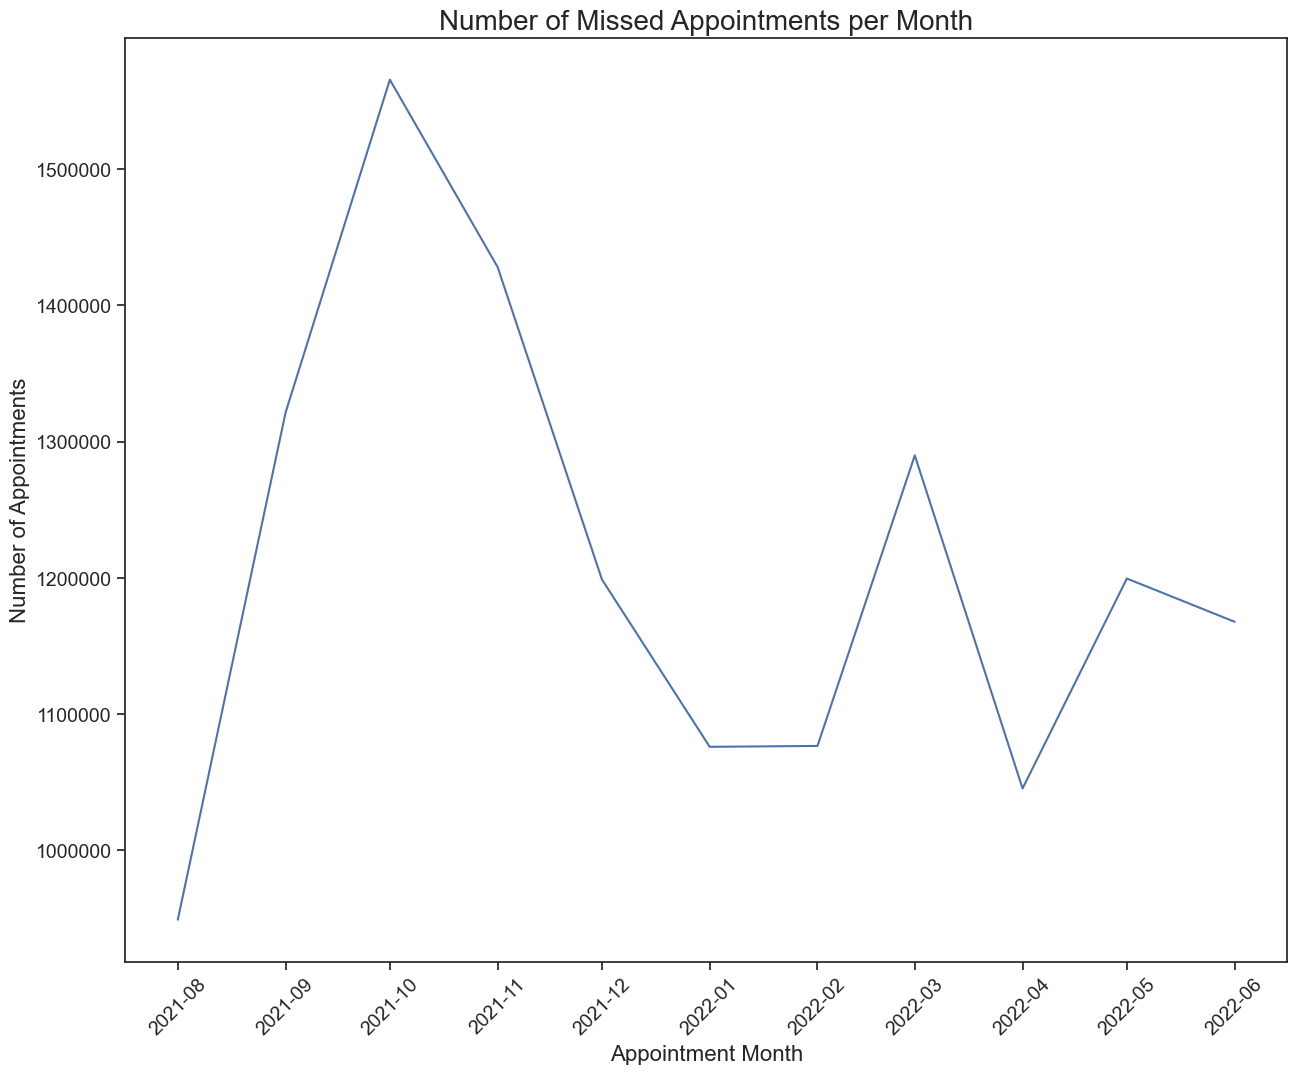

In [79]:
# Create a DataFrame that focuses on missed (DNA) appointments.
ar_dna = ar_updated[ar_updated['appointment_status']=='DNA']

# Create a DataFrame that is grouped by 'appointment_month' and \
# calculate the sum of appointments.
ar_dna_grouped = ar_dna.groupby('appointment_month')\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show the number of missed appointments over time.
ar_dna_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                          palette='colorblind', data=ar_dna_grouped, ci=None)

# Specify and format the labels.
ar_dna_vis.set_xlabel("Appointment Month", fontsize=16)
ar_dna_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_dna_vis.set_title("Number of Missed Appointments per Month", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> October 2021 represented the month with the most missed appointments. 

In [80]:
# Save the missed appointments visualisation as a PNG file.
fig_ar_dna_vis = ar_dna_vis.get_figure()
fig_ar_dna_vis.set_size_inches(15, 12)
fig_ar_dna_vis.savefig('monthly_missed_appointments.png', dpi=150)

**Identify whether appointment mode is connected to missed appointments.**

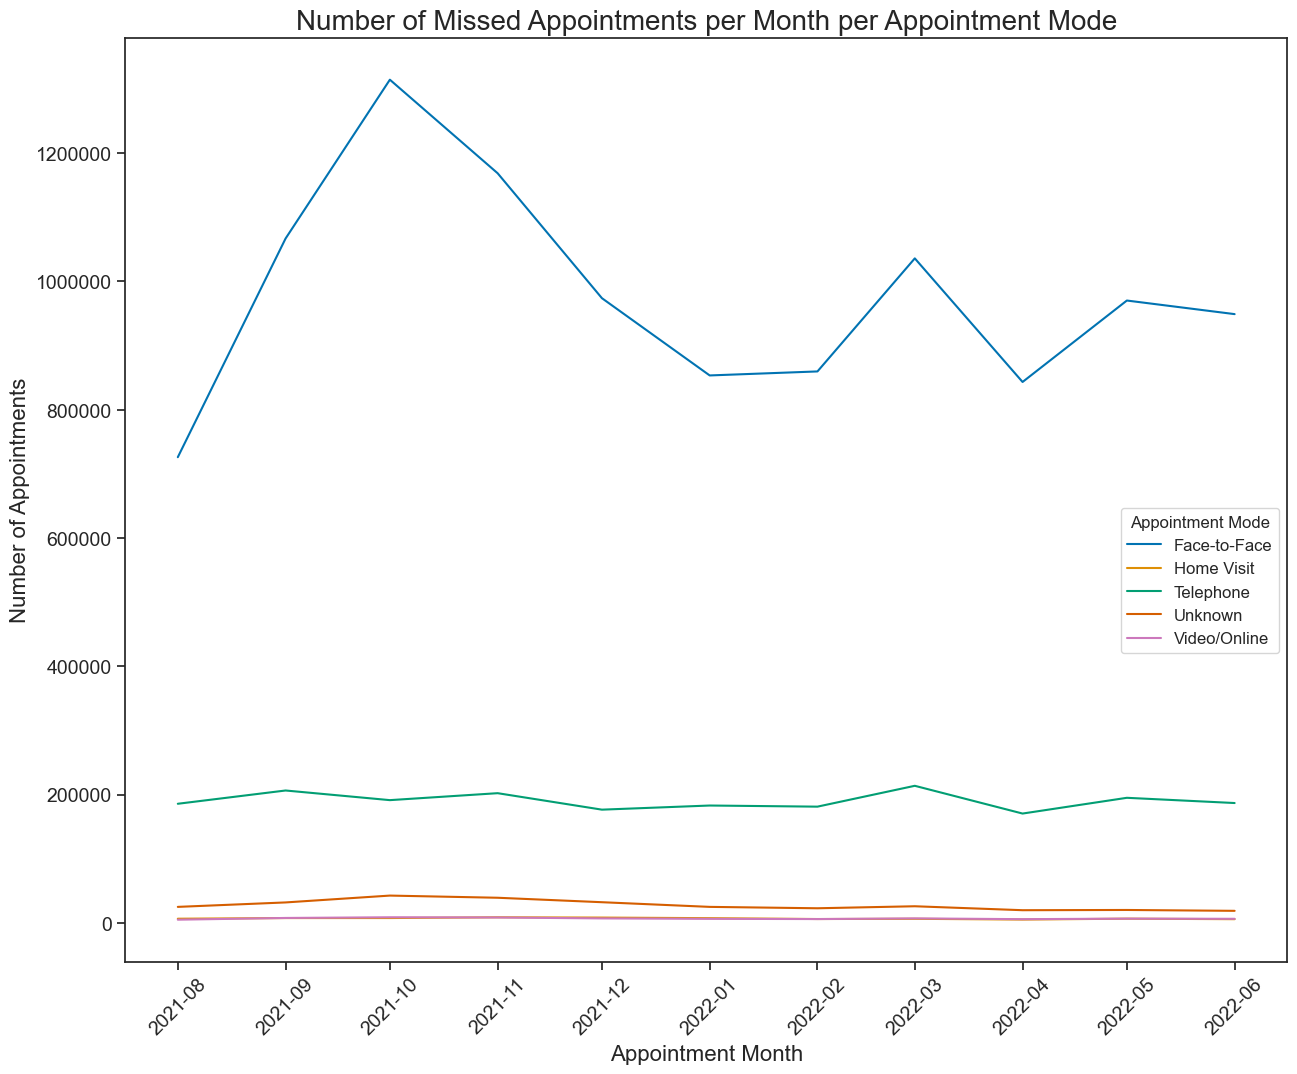

In [81]:
# See whether appointment mode is connected to missed appointments.
# Create a DataFrame that is grouped by 'appointment_month' and 'appointment_mode', and \
# calculate the sum of appointments.
ar_dna_mode = ar_dna.groupby(['appointment_month', 'appointment_mode'])\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show the number of missed appointments over time per appointment mode.
ar_dna_mode_vis = sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode',
                          palette='colorblind', data=ar_dna_mode, ci=None)

# Specify and format the labels.
ar_dna_mode_vis.set_xlabel("Appointment Month", fontsize=16)
ar_dna_mode_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_dna_mode_vis.set_title("Number of Missed Appointments per Month per Appointment Mode", fontsize=20)

plt.legend(title='Appointment Mode', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The majority of the appointments that were missed each month were face-to-face appointments. This may indicate accessibility issues for some patients. 

In [82]:
# Save the missed appointments mode visualisation as a PNG file.
fig_ar_dna_mode_vis = ar_dna_mode_vis.get_figure()
fig_ar_dna_mode_vis.set_size_inches(15, 12)
fig_ar_dna_mode_vis.savefig('monthly_missed_appointments_per_mode.png', dpi=150)

**Identify whether the length of the waiting period is connected to missed appointments.**

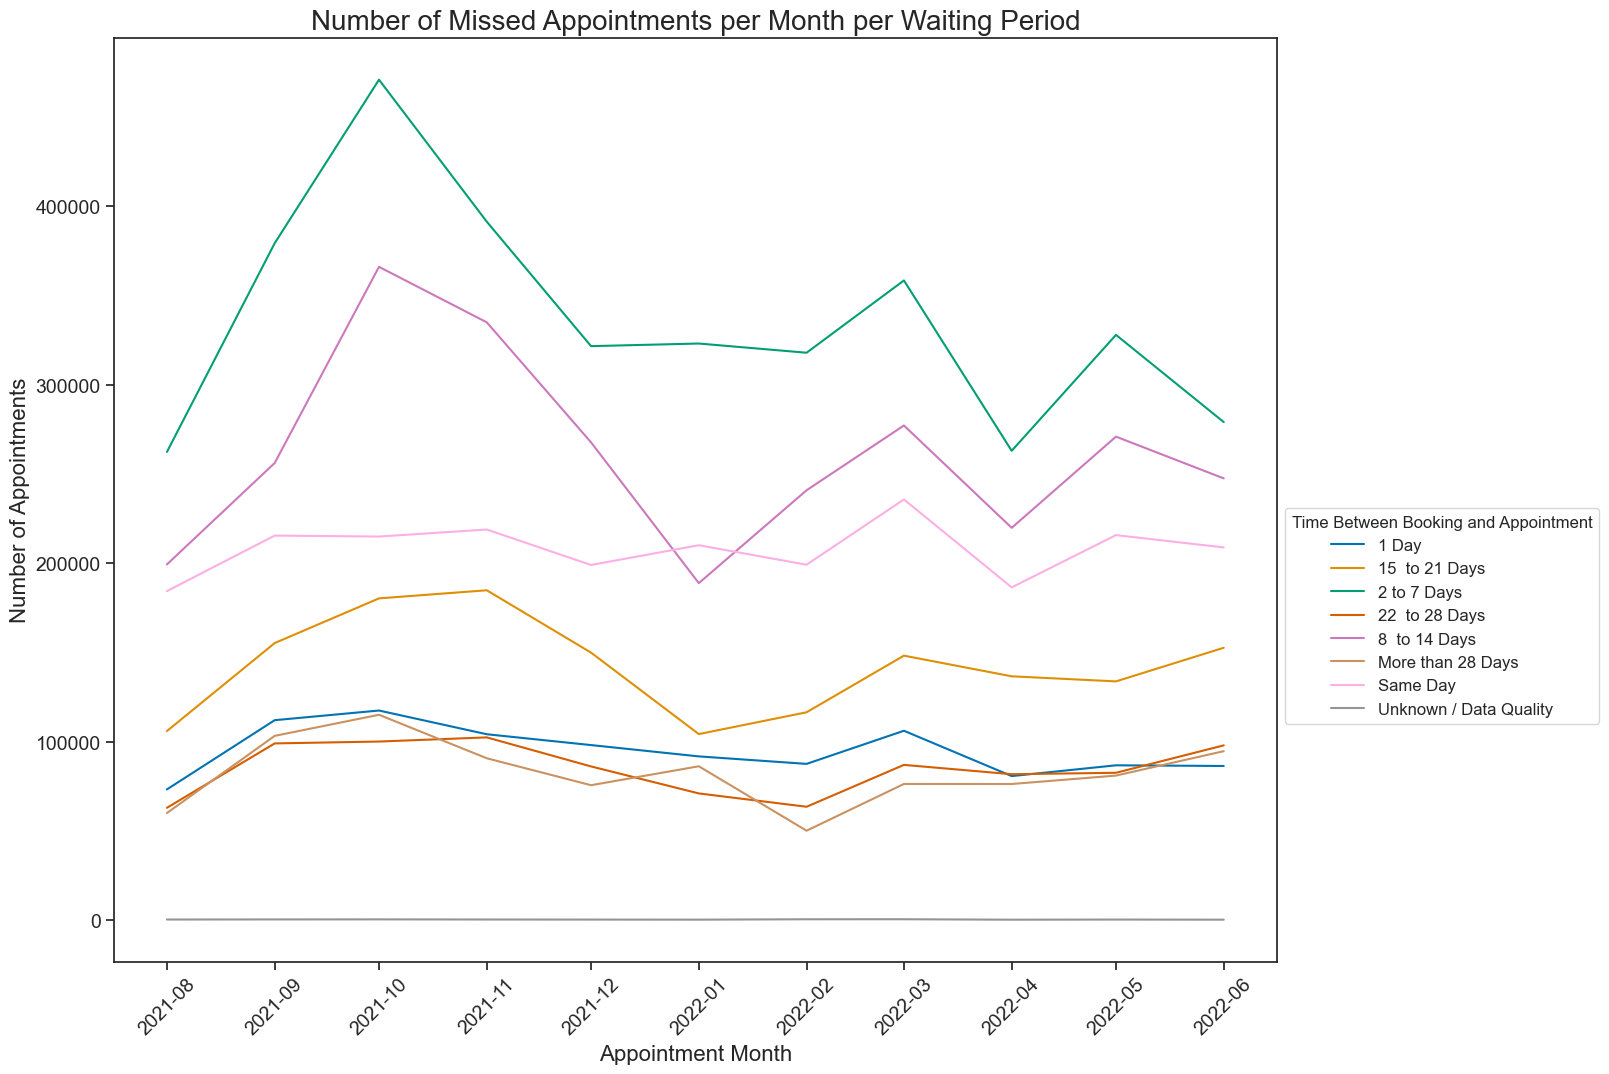

In [83]:
# See whether the time between booking and appointment (waiting period)\
# is connected to missed appointments.

# Create a DataFrame that is grouped by 'appointment_month' and 'time_between_book_and_appointment', \
# and calculate the sum of appointments.
ar_dna_time = ar_dna.groupby(['appointment_month', 'time_between_book_and_appointment'])\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show the number of missed appointments over time per waiting period.
ar_dna_time_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                               hue='time_between_book_and_appointment',
                               palette='colorblind', data=ar_dna_time, ci=None)

# Specify and format the labels.
ar_dna_time_vis.set_xlabel("Appointment Month", fontsize=16)
ar_dna_time_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_dna_time_vis.set_title("Number of Missed Appointments per Month per Waiting Period", fontsize=20)

plt.legend(title='Time Between Booking and Appointment', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> Although the waiting period with the most missed monthly appointments was 2 to 7 days, the lengths of the waiting periods didn't seem to have an obvious connection to the number of missed monthly appointments. 

In [84]:
# Save the missed appointments waiting period visualisation as a PNG file.
fig_ar_dna_time_vis = ar_dna_time_vis.get_figure()
fig_ar_dna_time_vis.set_size_inches(35, 15)
fig_ar_dna_time_vis.savefig('monthly_missed_appointments_per_waiting_period.png', dpi=150)

### Are there changes in terms of appointment mode and the busiest months?

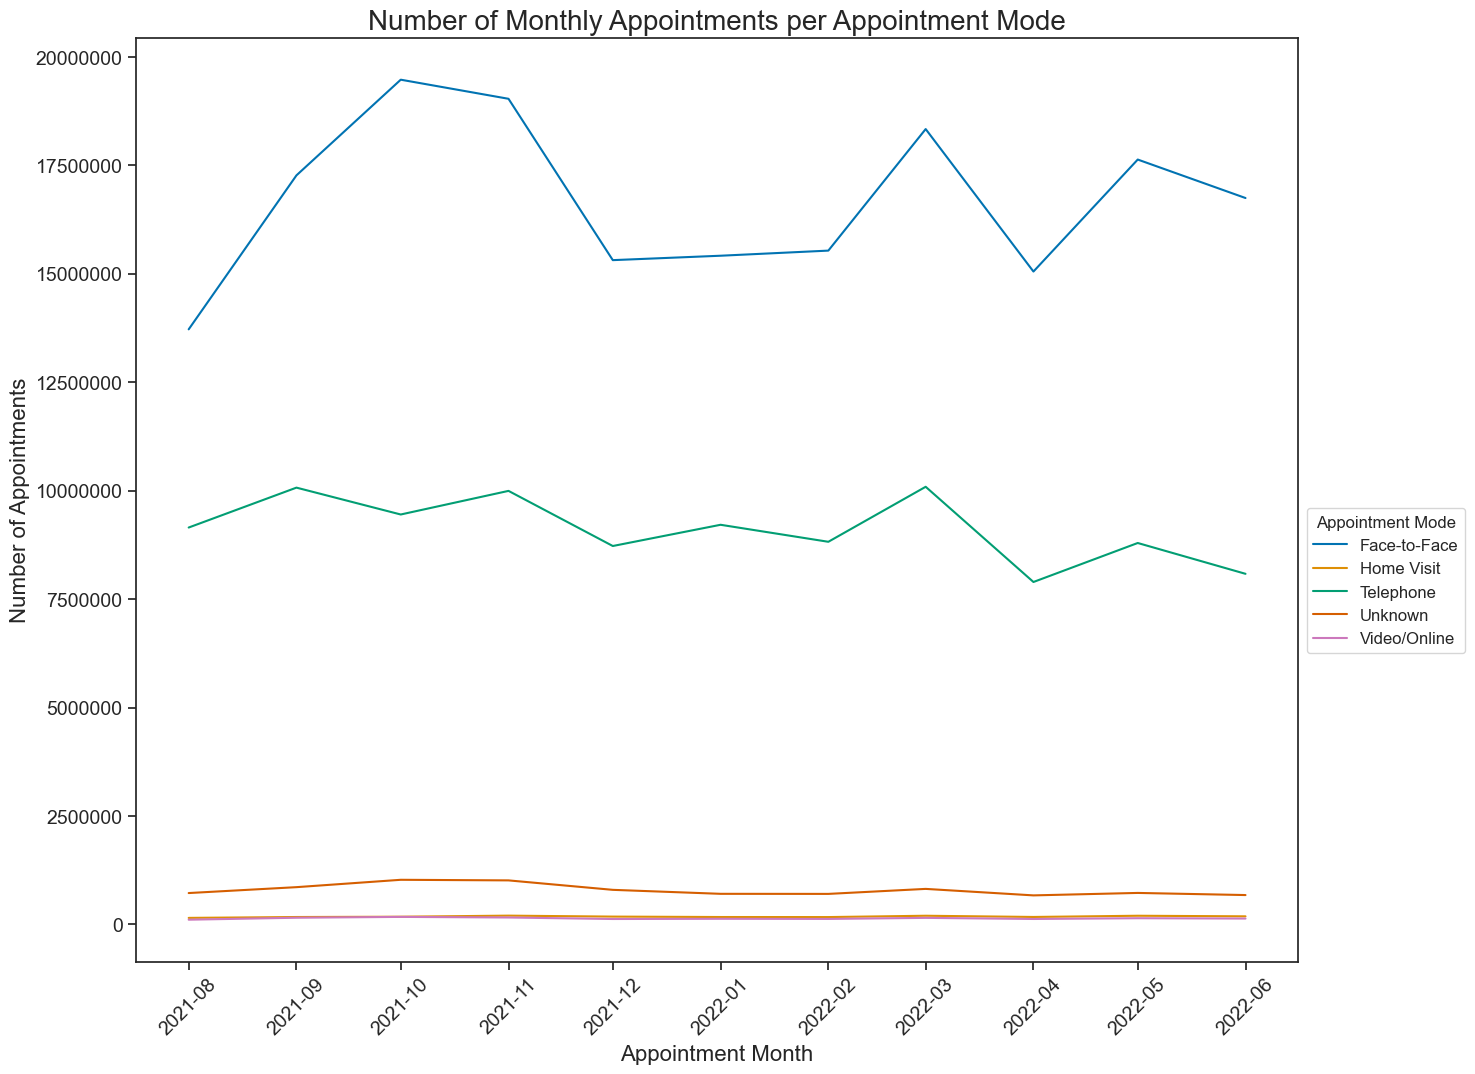

In [85]:
# Create a DataFrame that is grouped by 'appointment_month' and 'appointment_mode', and \
# calculate the sum of appointments.
ar_mode = ar_updated.groupby(['appointment_month', 'appointment_mode'])\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show how appointment modes differ over time.
ar_mode_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='appointment_mode', palette='colorblind',
                             data=ar_mode, ci=None)

# Specify and format the labels.
ar_mode_vis.set_xlabel("Appointment Month", fontsize=16)
ar_mode_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_mode_vis.set_title("Number of Monthly Appointments per Appointment Mode", fontsize=20)

plt.legend(title='Appointment Mode', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The appointment mode with the highest number of monthly appointments was face-to-face, followed by telephone appointments. The trend in the number of monthly face-to-face appointments closely followed the trend in the overall number of monthly appointments. 

In [86]:
# Save the appointment mode visualisation as a PNG file.
fig_ar_mode_vis = ar_mode_vis.get_figure()
fig_ar_mode_vis.set_size_inches(25, 15)
fig_ar_mode_vis.savefig('monthly_appointments_per_mode.png', dpi=150)

### Are there any trends in time between booking an appointment?

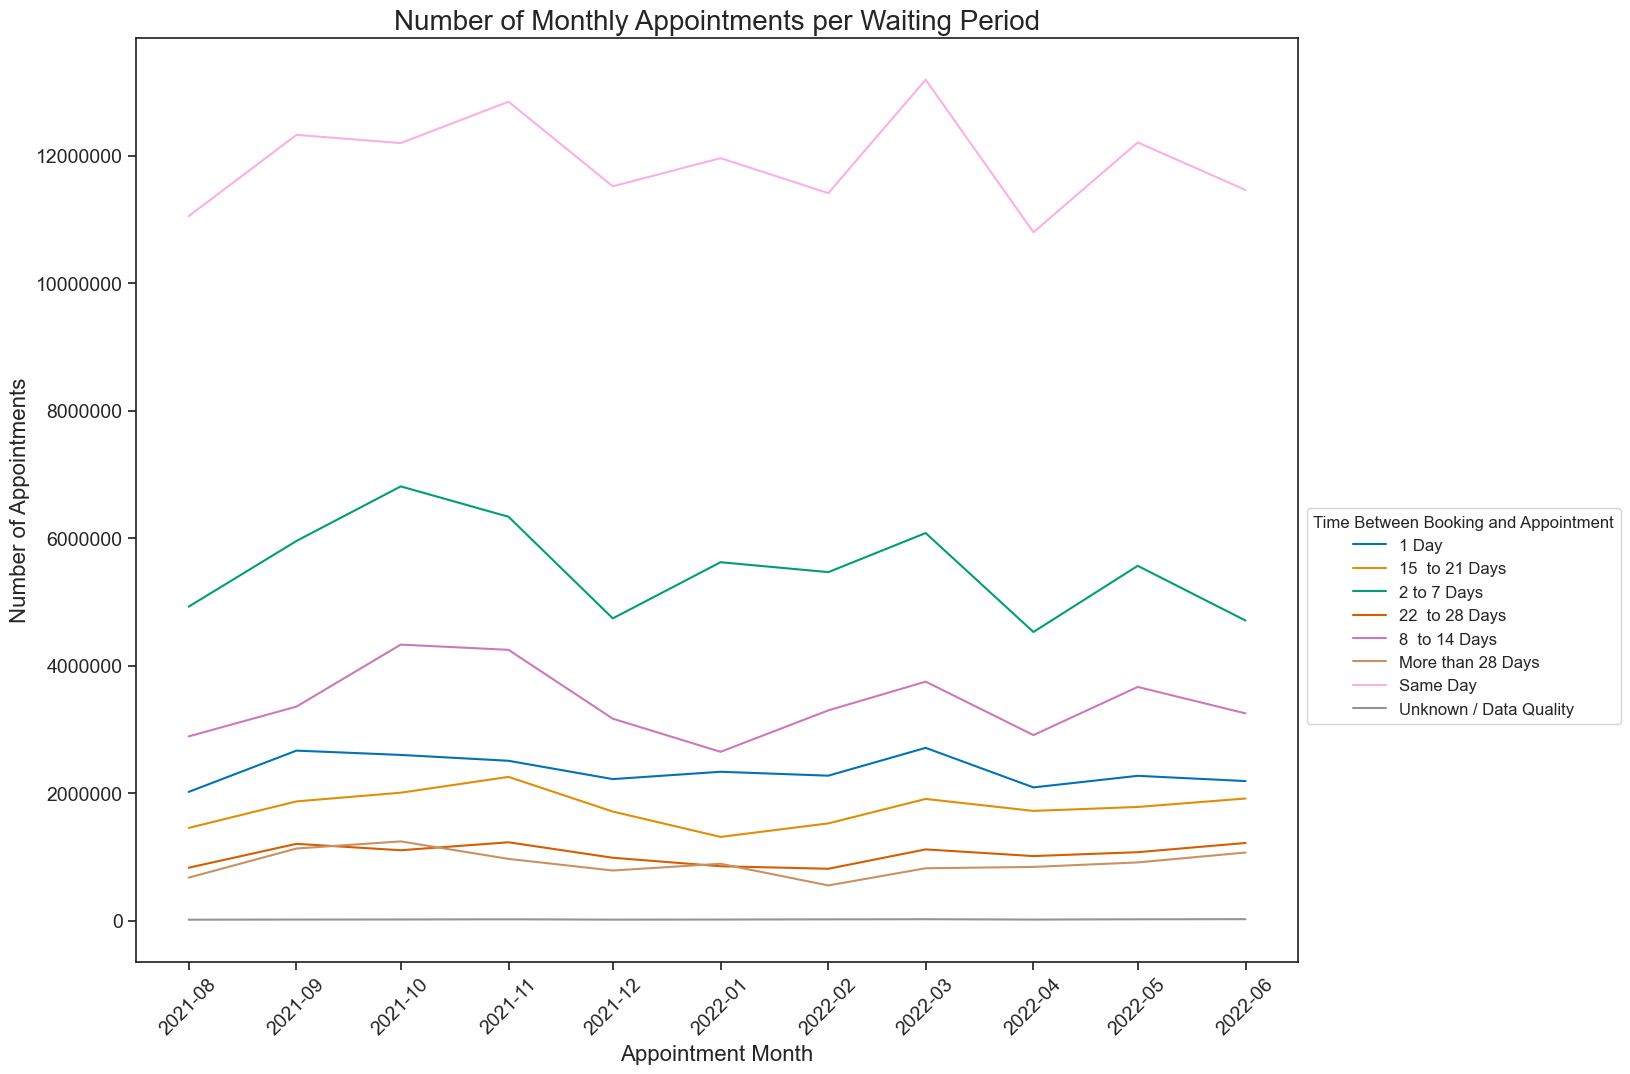

In [87]:
# Create a DataFrame that is grouped by 'appointment_month' and 'time_between_book_and_appointment', \
# and calculate the sum of appointments.
ar_booking = ar_updated.groupby(['appointment_month', 'time_between_book_and_appointment'])\
                             [['count_of_appointments']].sum().reset_index()

# Create a line plot to show how appointment waiting periods differ over time.
ar_booking_vis = sns.lineplot(x='appointment_month', y='count_of_appointments',
                         hue='time_between_book_and_appointment', palette='colorblind',
                             data=ar_booking, ci=None)

# Specify and format the labels.
ar_booking_vis.set_xlabel("Appointment Month", fontsize=16)
ar_booking_vis.set_ylabel("Number of Appointments", fontsize=16)
ar_booking_vis.set_title("Number of Monthly Appointments per Waiting Period", fontsize=20)

plt.legend(title='Time Between Booking and Appointment', fontsize=12, bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> Same day appointments represented the waiting period with the highest number of monthly appointments, followed by a waiting period of 2 to 7 days.

In [88]:
# Save the waiting period visualisation as a PNG file.
fig_ar_booking_vis = ar_booking_vis.get_figure()
fig_ar_booking_vis.set_size_inches(35, 15)
fig_ar_booking_vis.savefig('monthly_appointments_per_waiting_period.png', dpi=150)

### How do the spread of service settings compare?

In [89]:
# Return to the nc DataFrame created earlier.
# Create a new DataFrame that is grouped by 'appointment_month' and 'service_setting', \
# and calculate the sum of appointments.
nc_updated = nc.groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
.sum().sort_values('appointment_month').reset_index()

# View the DataFrame.
nc_updated

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


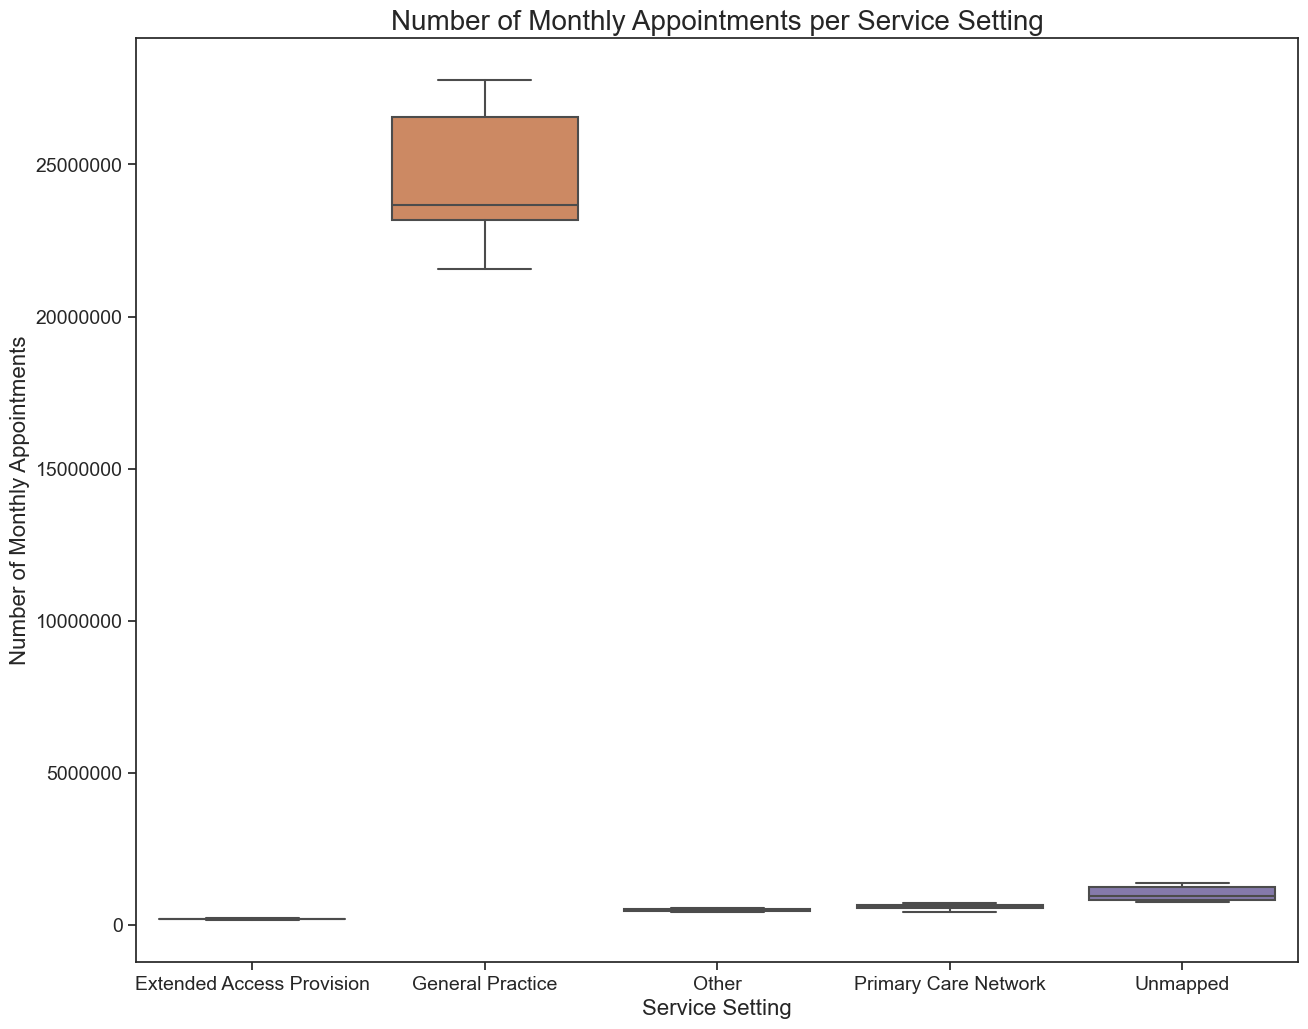

In [90]:
# Create a boxplot to investigate spread of service settings.
nc_updated_box = sns.boxplot(data=nc_updated, x="service_setting", y="count_of_appointments")

# Specify and format the labels.
nc_updated_box.set_xlabel("Service Setting", fontsize=16)
nc_updated_box.set_ylabel("Number of Monthly Appointments", fontsize=16)
nc_updated_box.set_title("Number of Monthly Appointments per Service Setting", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> The vast majority of monthly appointments were recorded in the General Practice service setting. 

In [91]:
# Save the service setting box plot as a PNG file.
fig_nc_updated_box = nc_updated_box.get_figure()
fig_nc_updated_box.set_size_inches(15, 12)
fig_nc_updated_box.savefig('monthly_appointments_per_service_setting.png', dpi=150)

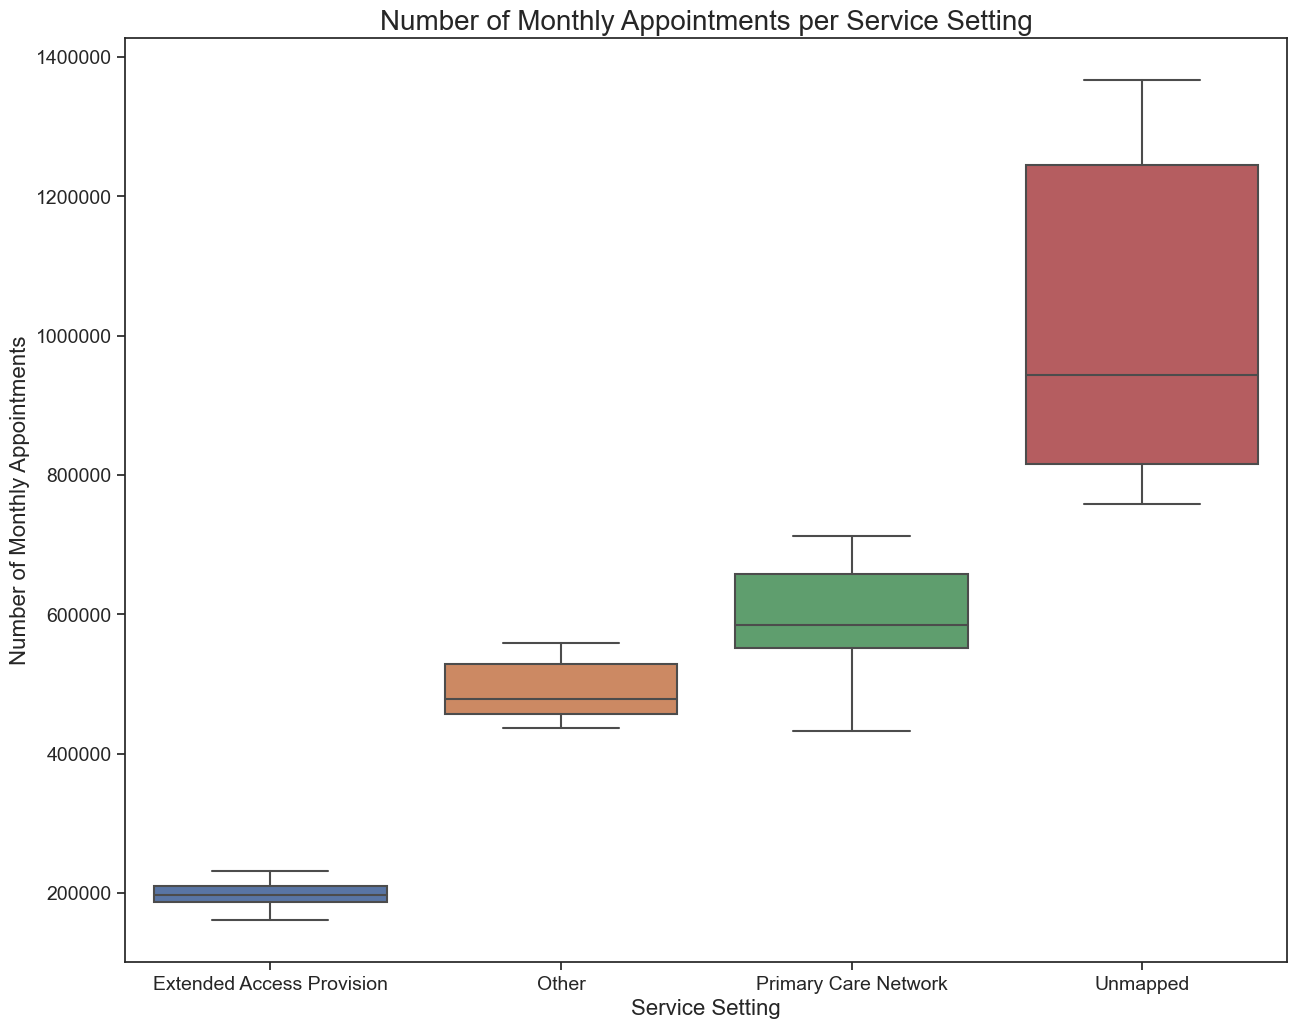

In [92]:
# Create a boxplot to investigate the service settings without the GP service setting.

# Create a DataFrame that excludes the GP service setting.
nc_final = nc_updated[nc_updated['service_setting']!='General Practice']

# Create a boxplot using the new DataFrame.
nc_final_box = sns.boxplot(data=nc_final, x="service_setting", y="count_of_appointments")

# Specify and format the labels.
nc_final_box.set_xlabel("Service Setting", fontsize=16)
nc_final_box.set_ylabel("Number of Monthly Appointments", fontsize=16)
nc_final_box.set_title("Number of Monthly Appointments per Service Setting", fontsize=20)

plt.tick_params(axis='both', which='major', labelsize=14)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

plt.show()

> When excluding the General Practice service setting, the service setting that represented the highest number of monthly appointments was "Unmapped". This demonstrates that the NHS could improve their record keeping and data mapping.

In [93]:
# Save the service setting (excluding GP) box plot as a PNG file.
fig_nc_final_box = nc_final_box.get_figure()
fig_nc_final_box.set_size_inches(15, 12)
fig_nc_final_box.savefig('monthly_appointments_per_ss_no_GP.png', dpi=150)

# 